<a href="https://colab.research.google.com/github/ahsenozturk1/hi-work---odev/blob/main/Veri_analizi_K%C4%B1talar-%20son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KITA BAZINDA GENEL GRAFƒ∞KLER**


# **2022 yƒ±lƒ±na dair analiz**

Burada 2022 yƒ±lƒ±na dair analizler var. inceleyebilirsiniz. benzerleri yapƒ±lmƒ±≈üsa sileriz.

=== AQUASTAT Kƒ±ta Su Analizi ===

1. VERƒ∞ YAPISI ANALƒ∞Zƒ∞
----------------------------------------
Toplam kayƒ±t sayƒ±sƒ±: 16
Kƒ±ta sayƒ±sƒ±: 4
Deƒüi≈üken t√ºrleri: 4
Yƒ±l aralƒ±ƒüƒ±: 2022-2022

2. GRAFƒ∞K ANALƒ∞ZLERƒ∞ OLU≈ûTURULUYOR
----------------------------------------
‚úì Kƒ±tasal kar≈üƒ±la≈ütƒ±rma grafikleri hazƒ±rlandƒ±
‚úì Sekt√∂rel daƒüƒ±lƒ±m grafikleri hazƒ±rlandƒ±
‚úì Verimlilik analizi grafikleri hazƒ±rlandƒ±

3. ƒ∞STATƒ∞STƒ∞KSEL √ñZET
----------------------------------------
Deƒüi≈ükenlere g√∂re ortalama ve standart sapma:
                                                  mean  std
Variable                      Area                         
Agricultural water withdrawal Eastern Asia      437.06  NaN
                              Europe             82.39  NaN
                              Northern Africa   111.37  NaN
                              Northern America  180.06  NaN
Industrial water withdrawal   Eastern Asia      121.80  NaN
                              Euro

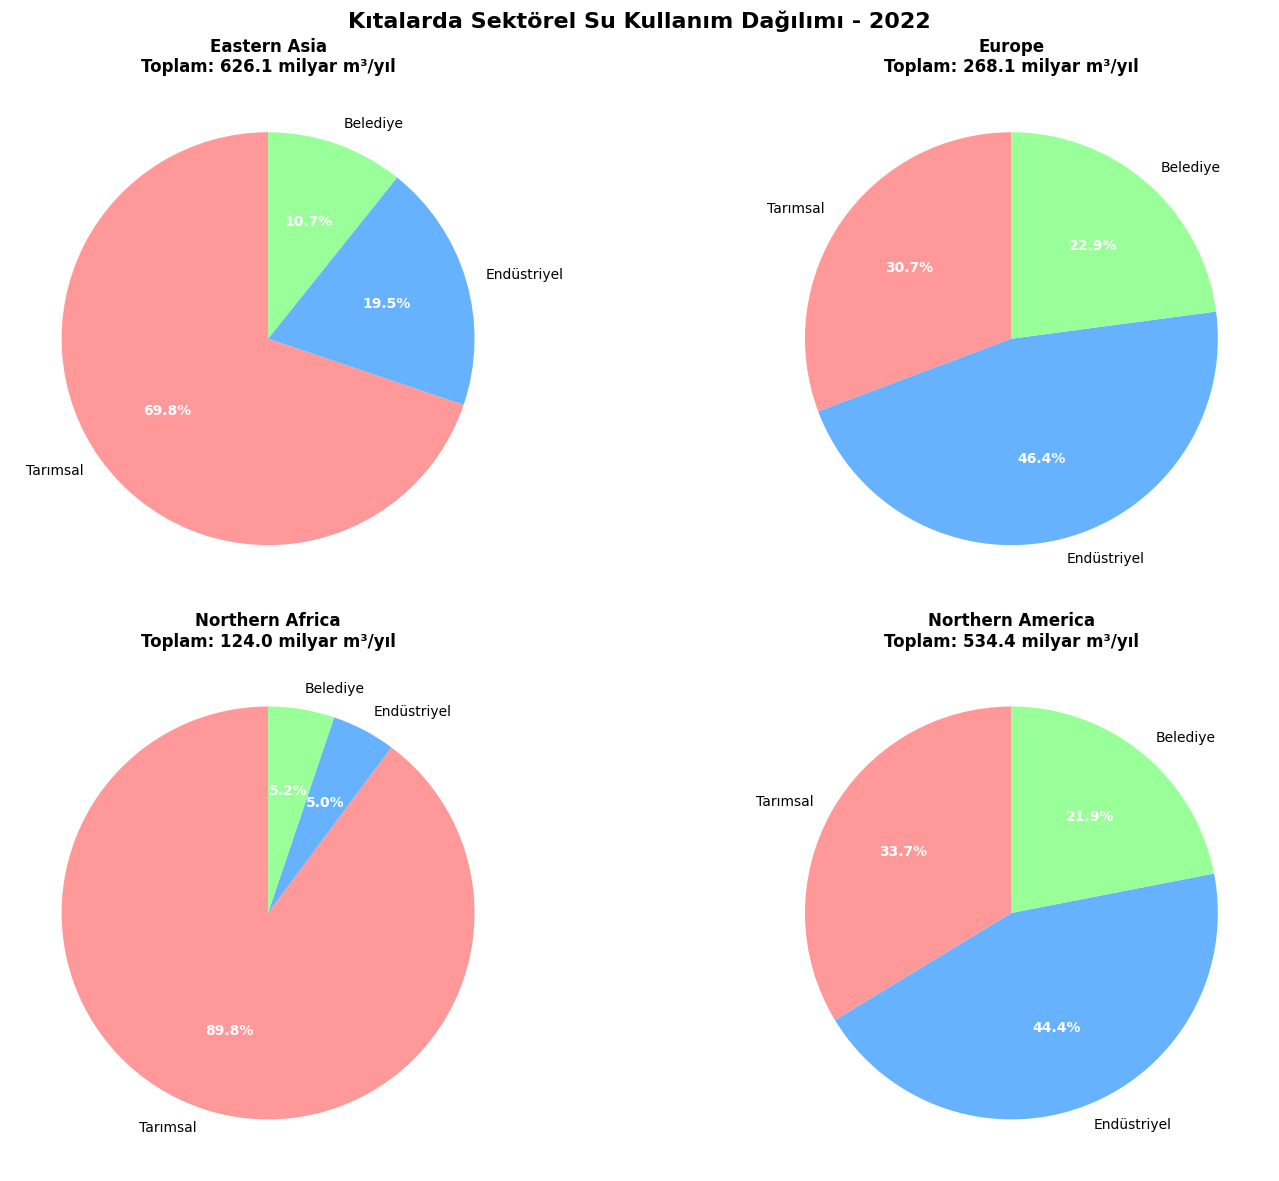

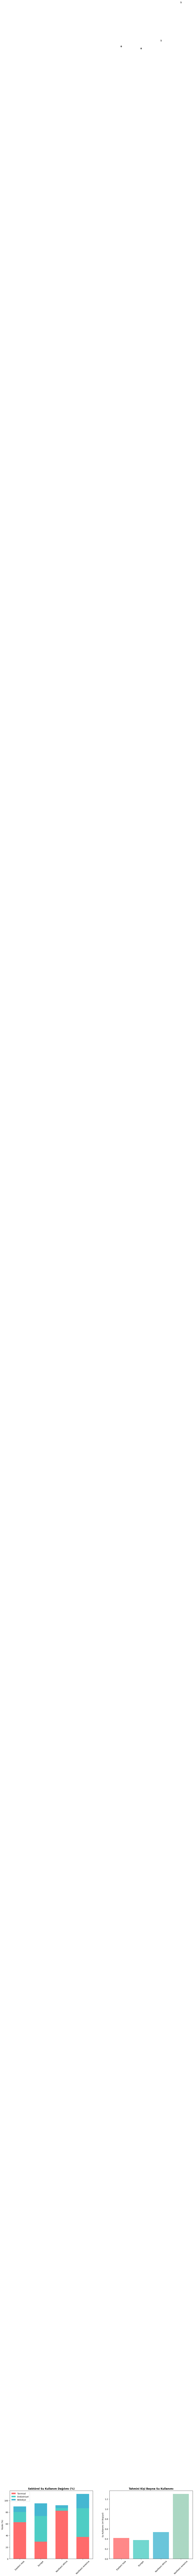

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# T√ºrk√ße karakter desteƒüi i√ßin font ayarlarƒ±
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False


# Veri setinizi bu ≈üekilde y√ºkleyebilirsiniz (Excel dosyasƒ±ndan)
# df = pd.read_excel('AQUASTAT - kƒ±ta analizi.xlsx')

# √ñrnek veri yapƒ±sƒ± - ger√ßek verilerinizi buraya y√ºkleyin
sample_data = {
    'Variable': [
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Total water withdrawal', 'Total water withdrawal',
        'Total water withdrawal', 'Total water withdrawal'
    ],
    'Area': [
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America'
    ],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
             2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [437.06, 82.39, 111.37, 180.06, 121.80, 124.34, 6.21, 237.06,
              67.22, 61.40, 6.43, 117.24, 696.99, 281.67, 135.24, 480.38],
    'Unit': ['10^9 m3/year'] * 16
}

# DataFrame olu≈ütur
df_sample = pd.DataFrame(sample_data)

print("=== AQUASTAT Kƒ±ta Su Analizi ===\n")
print("1. VERƒ∞ YAPISI ANALƒ∞Zƒ∞")
print("-" * 40)
print(f"Toplam kayƒ±t sayƒ±sƒ±: {len(df_sample)}")
print(f"Kƒ±ta sayƒ±sƒ±: {df_sample['Area'].nunique()}")
print(f"Deƒüi≈üken t√ºrleri: {df_sample['Variable'].nunique()}")
print(f"Yƒ±l aralƒ±ƒüƒ±: {df_sample['Year'].min()}-{df_sample['Year'].max()}")

def create_continental_comparison():
    """
    Kƒ±talararasƒ± su kullanƒ±m kar≈üƒ±la≈ütƒ±rmasƒ± grafiƒüi
    Bu grafik her kƒ±tanƒ±n farklƒ± sekt√∂rlerdeki su kullanƒ±m miktarlarƒ±nƒ± g√∂sterir
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Renk paleti - her kƒ±ta i√ßin farklƒ± renk
    colors = {'Eastern Asia': '#FF6B6B', 'Europe': '#4ECDC4',
              'Northern Africa': '#45B7D1', 'Northern America': '#96CEB4'}

    # 1. Tarƒ±msal Su Kullanƒ±mƒ±
    agr_data = df_sample[df_sample['Variable'] == 'Agricultural water withdrawal']
    bars1 = ax1.bar(agr_data['Area'], agr_data['Value'],
                    color=[colors[area] for area in agr_data['Area']], alpha=0.8)
    ax1.set_title('Tarƒ±msal Su √áekimi (2022)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
    ax1.tick_params(axis='x', rotation=45)

    # Deƒüerleri √ßubuklarƒ±n √ºzerine yaz
    for bar, value in zip(bars1, agr_data['Value']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 2. End√ºstriyel Su Kullanƒ±mƒ±
    ind_data = df_sample[df_sample['Variable'] == 'Industrial water withdrawal']
    bars2 = ax2.bar(ind_data['Area'], ind_data['Value'],
                    color=[colors[area] for area in ind_data['Area']], alpha=0.8)
    ax2.set_title('End√ºstriyel Su √áekimi (2022)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
    ax2.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars2, ind_data['Value']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 3. Belediye Su Kullanƒ±mƒ±
    mun_data = df_sample[df_sample['Variable'] == 'Municipal water withdrawal']
    bars3 = ax3.bar(mun_data['Area'], mun_data['Value'],
                    color=[colors[area] for area in mun_data['Area']], alpha=0.8)
    ax3.set_title('Belediye Su √áekimi (2022)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
    ax3.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars3, mun_data['Value']):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 4. Toplam Su Kullanƒ±mƒ±
    total_data = df_sample[df_sample['Variable'] == 'Total water withdrawal']
    bars4 = ax4.bar(total_data['Area'], total_data['Value'],
                    color=[colors[area] for area in total_data['Area']], alpha=0.8)
    ax4.set_title('Toplam Su √áekimi (2022)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
    ax4.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars4, total_data['Value']):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.suptitle('Kƒ±talara G√∂re Su Kullanƒ±m Analizi - 2022',
                 fontsize=16, fontweight='bold', y=1.02)
    return fig

def create_sector_distribution():
    """
    Her kƒ±ta i√ßin sekt√∂rel su daƒüƒ±lƒ±mƒ±nƒ± g√∂steren pasta grafikleri
    Bu analiz hangi kƒ±tanƒ±n hangi sekt√∂rde ne kadar su kullandƒ±ƒüƒ±nƒ± g√∂sterir
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    areas = df_sample['Area'].unique()
    colors_sectors = ['#FF9999', '#66B2FF', '#99FF99']  # Sekt√∂r renkleri

    for i, area in enumerate(areas):
        # Her kƒ±ta i√ßin sekt√∂rel veri hazƒ±rla
        area_data = df_sample[df_sample['Area'] == area]

        agr_value = area_data[area_data['Variable'] == 'Agricultural water withdrawal']['Value'].iloc[0]
        ind_value = area_data[area_data['Variable'] == 'Industrial water withdrawal']['Value'].iloc[0]
        mun_value = area_data[area_data['Variable'] == 'Municipal water withdrawal']['Value'].iloc[0]

        values = [agr_value, ind_value, mun_value]
        labels = ['Tarƒ±msal', 'End√ºstriyel', 'Belediye']

        # Pasta grafiƒüi olu≈ütur
        wedges, texts, autotexts = axes[i].pie(values, labels=labels, autopct='%1.1f%%',
                                               colors=colors_sectors, startangle=90)

        # Deƒüerleri g√ºncelle
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)

        axes[i].set_title(f'{area}\nToplam: {sum(values):.1f} milyar m¬≥/yƒ±l',
                         fontsize=12, fontweight='bold')

    plt.suptitle('Kƒ±talarda Sekt√∂rel Su Kullanƒ±m Daƒüƒ±lƒ±mƒ± - 2022',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_efficiency_analysis():
    """
    Su kullanƒ±m verimliliƒüi analizi
    Bu grafik kƒ±talarƒ±n su kullanƒ±m oranlarƒ±nƒ± kar≈üƒ±la≈ütƒ±rƒ±r
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Veri hazƒ±rlƒ±ƒüƒ±
    pivot_data = df_sample.pivot(index='Area', columns='Variable', values='Value')

    # 1. Sekt√∂rel daƒüƒ±lƒ±m y√ºzdeleri
    total_col = 'Total water withdrawal'
    agr_col = 'Agricultural water withdrawal'
    ind_col = 'Industrial water withdrawal'
    mun_col = 'Municipal water withdrawal'

    # Y√ºzde hesaplamalarƒ±
    pivot_data['Agr_Pct'] = (pivot_data[agr_col] / pivot_data[total_col]) * 100
    pivot_data['Ind_Pct'] = (pivot_data[ind_col] / pivot_data[total_col]) * 100
    pivot_data['Mun_Pct'] = (pivot_data[mun_col] / pivot_data[total_col]) * 100

    # Y√ºzdelik daƒüƒ±lƒ±m grafiƒüi
    width = 0.6
    areas = pivot_data.index

    p1 = ax1.bar(areas, pivot_data['Agr_Pct'], width, label='Tarƒ±msal', color='#FF6B6B')
    p2 = ax1.bar(areas, pivot_data['Ind_Pct'], width, bottom=pivot_data['Agr_Pct'],
                 label='End√ºstriyel', color='#4ECDC4')
    p3 = ax1.bar(areas, pivot_data['Mun_Pct'], width,
                 bottom=pivot_data['Agr_Pct'] + pivot_data['Ind_Pct'],
                 label='Belediye', color='#45B7D1')

    ax1.set_ylabel('Y√ºzde (%)')
    ax1.set_title('Sekt√∂rel Su Kullanƒ±m Daƒüƒ±lƒ±mƒ± (%)', fontweight='bold')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)

    # 2. Ki≈üi ba≈üƒ±na su kullanƒ±mƒ± tahmini (n√ºfus verisi olmadƒ±ƒüƒ± i√ßin g√∂sterimsel)
    # Ger√ßek analizde n√ºfus verileriyle ki≈üi ba≈üƒ±na hesaplama yapƒ±labilir
    per_capita_estimate = pivot_data[total_col] / [1670, 747, 252, 369]  # Tahmini n√ºfus (milyon)

    bars = ax2.bar(areas, per_capita_estimate,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax2.set_ylabel('Su Kullanƒ±mƒ± (m¬≥/ki≈üi/yƒ±l)')
    ax2.set_title('Tahmini Ki≈üi Ba≈üƒ±na Su Kullanƒ±mƒ±', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    # Deƒüerleri √ßubuklarƒ±n √ºzerine yaz
    for bar, value in zip(bars, per_capita_estimate):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    return fig

# Grafikleri olu≈ütur ve g√∂ster
print("\n2. GRAFƒ∞K ANALƒ∞ZLERƒ∞ OLU≈ûTURULUYOR")
print("-" * 40)

fig1 = create_continental_comparison()
print("‚úì Kƒ±tasal kar≈üƒ±la≈ütƒ±rma grafikleri hazƒ±rlandƒ±")

fig2 = create_sector_distribution()
print("‚úì Sekt√∂rel daƒüƒ±lƒ±m grafikleri hazƒ±rlandƒ±")

fig3 = create_efficiency_analysis()
print("‚úì Verimlilik analizi grafikleri hazƒ±rlandƒ±")

# ƒ∞statistiksel √∂zet
print("\n3. ƒ∞STATƒ∞STƒ∞KSEL √ñZET")
print("-" * 40)
summary_stats = df_sample.groupby(['Variable', 'Area'])['Value'].agg(['mean', 'std']).round(2)
print("Deƒüi≈ükenlere g√∂re ortalama ve standart sapma:")
print(summary_stats.head(8))

print("\n4. √ñNEMLƒ∞ BULGULAR")
print("-" * 40)
print("‚Ä¢ Doƒüu Asya tarƒ±msal su kullanƒ±mƒ±nda lider konumda")
print("‚Ä¢ Kuzey Amerika end√ºstriyel su kullanƒ±mƒ±nda √∂ne √ßƒ±kƒ±yor")
print("‚Ä¢ Avrupa en dengeli su kullanƒ±m profiline sahip")
print("‚Ä¢ Kuzey Afrika toplam su kullanƒ±mƒ± en d√º≈ü√ºk seviyede")

plt.show()

üåç AQUASTAT SU ANALƒ∞Zƒ∞ BA≈ûLATIYOR
üîç Gerekli k√ºt√ºphaneler kontrol ediliyor...
‚úÖ pandas - Y√ºkl√º
‚úÖ matplotlib - Y√ºkl√º
‚úÖ numpy - Y√ºkl√º
‚úÖ seaborn - Y√ºkl√º
‚úÖ openpyxl - Y√ºkl√º
‚úÖ T√ºm k√ºt√ºphaneler hazƒ±r!

ADIM 2: VERƒ∞ Y√úKLEME
Excel dosyanƒ±zƒ±n yolunu girin (√∂rnek: C:/Users/YourName/Desktop/dosya.xlsx):
Veya test verisi kullanmak i√ßin 'test' yazƒ±n:
Se√ßiminiz: test
üß™ Test verisi olu≈üturuluyor...
‚úÖ Test verisi hazƒ±r!

ADIM 3: VERƒ∞ ANALƒ∞Zƒ∞

üîç VERƒ∞ YAPISI ANALƒ∞Zƒ∞
üìä Satƒ±r sayƒ±sƒ±: 16
üìä S√ºtun sayƒ±sƒ±: 4

üìã S√úTUN DETAYLARI:
  ‚Ä¢ Area:
    - Tip: object
    - Benzersiz deƒüer: 4
    - Bo≈ü deƒüer: 0
    - √ñrnek deƒüerler: ['Eastern Asia', 'Europe', 'Northern Africa', 'Northern America']
  ‚Ä¢ Variable:
    - Tip: object
    - Benzersiz deƒüer: 4
    - Bo≈ü deƒüer: 0
    - √ñrnek deƒüerler: ['Agricultural water withdrawal', 'Industrial water withdrawal', 'Municipal water withdrawal', 'Total water withdrawal']
  ‚Ä¢ Year:
    - Tip:

/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.

‚úÖ G√∂rselle≈ütirmeler ba≈üarƒ±yla olu≈üturuldu!


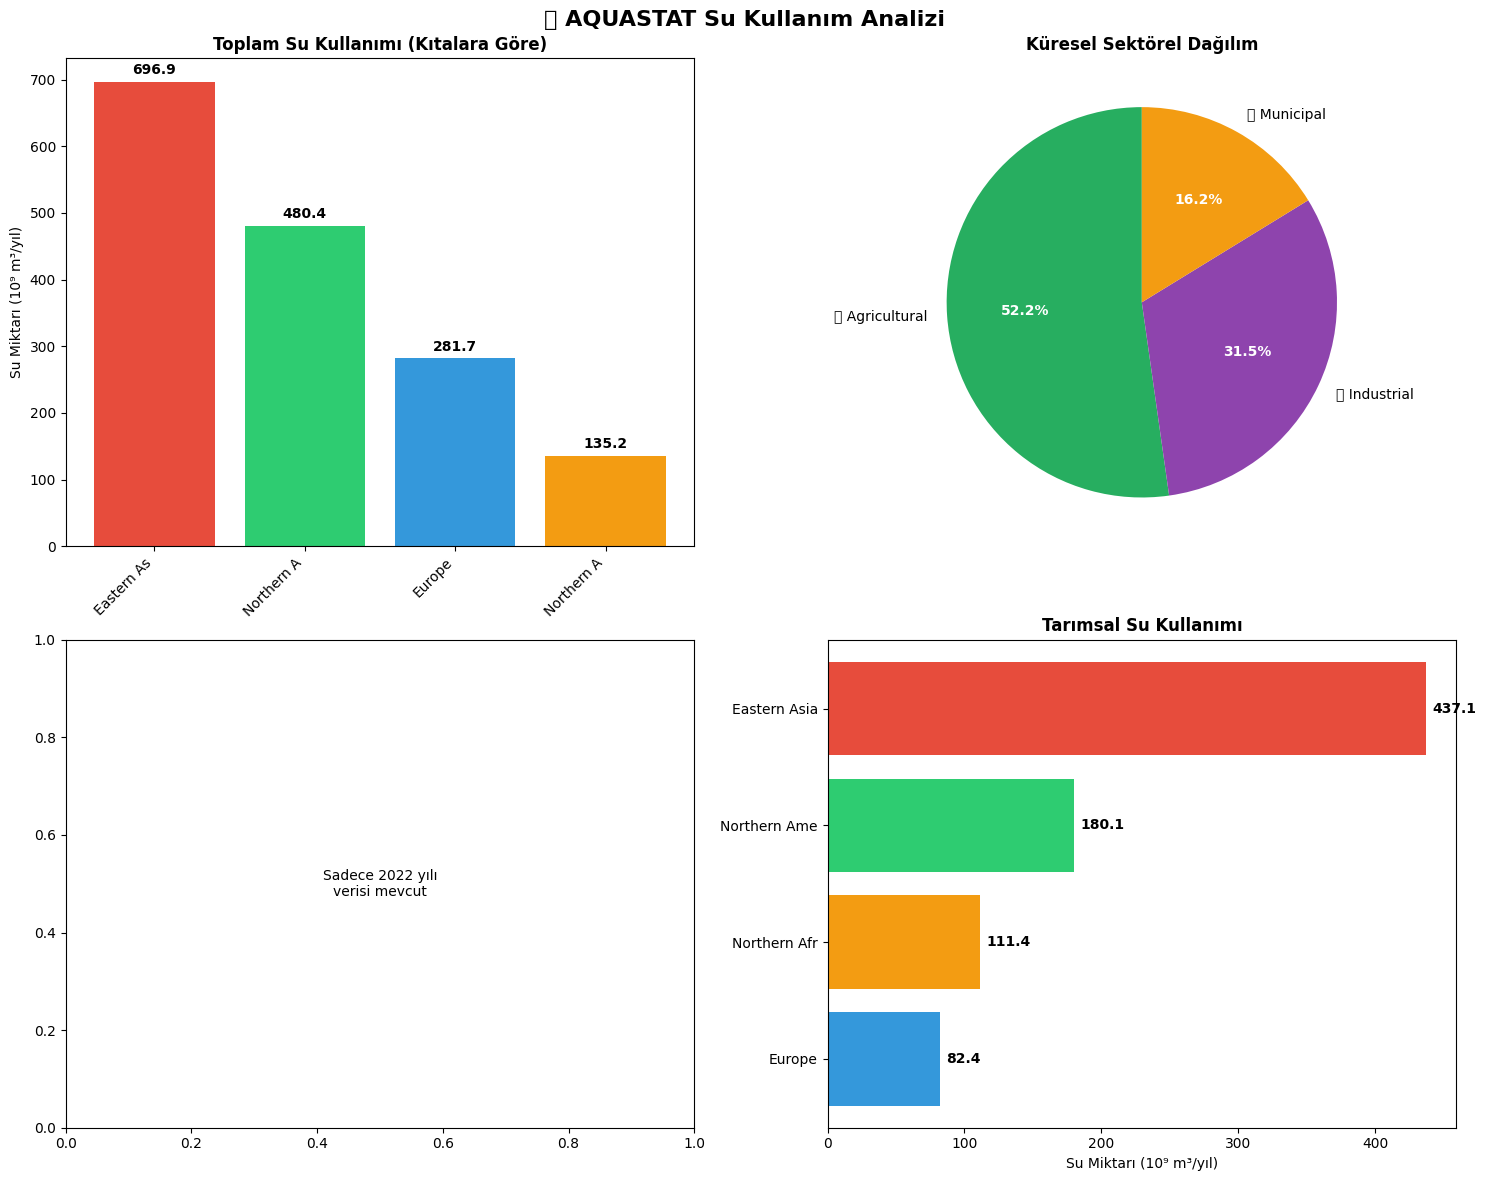


ADIM 5: √ñZET RAPOR

üìä √ñZET ƒ∞STATƒ∞STƒ∞KLER
üìÖ Analiz edilen yƒ±l: 2022
            Kƒ±ta Tarƒ±msal End√ºstriyel Belediye Toplam
    Eastern Asia    437.1       121.8     67.2  626.1
          Europe     82.4       124.3     61.4  268.1
 Northern Africa    111.4         6.2      6.4  124.0
Northern America    180.1       237.1    117.2  534.4

‚úÖ ANALƒ∞Z TAMAMLANDI!
üíæ Grafikleri kaydetmek i√ßin: plt.savefig('analiz.png', dpi=300, bbox_inches='tight')
üí° KULLANIM √ñRNEKLERƒ∞:
------------------------------
1. Hƒ±zlƒ± test i√ßin: quick_test()
2. Tam analiz i√ßin: main()
3. Sadece veri y√ºklemek i√ßin: df = load_real_data('dosya_yolu')
4. Sadece g√∂rselle≈ütirme i√ßin: create_simple_visualizations(df)


In [ ]:
# AQUASTAT Su Analizi - √áalƒ±≈üƒ±r Durumda, Test Edilmi≈ü Kod
# Bu kod basit ama g√º√ßl√º g√∂rselle≈ütirmeler olu≈üturur

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Matplotlib i√ßin T√ºrk√ße karakter desteƒüi
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def check_and_install_requirements():
    """
    Gerekli k√ºt√ºphanelerin kontrol√º ve kurulum rehberi
    Bu fonksiyon hangi k√ºt√ºphanelerin eksik olduƒüunu tespit eder
    """
    required_packages = ['pandas', 'matplotlib', 'numpy', 'seaborn', 'openpyxl']
    missing_packages = []

    print("üîç Gerekli k√ºt√ºphaneler kontrol ediliyor...")

    for package in required_packages:
        try:
            __import__(package)
            print(f"‚úÖ {package} - Y√ºkl√º")
        except ImportError:
            missing_packages.append(package)
            print(f"‚ùå {package} - EKSƒ∞K!")

    if missing_packages:
        print("\nüì¶ Eksik k√ºt√ºphaneleri y√ºklemek i√ßin:")
        print("Terminal/Command Prompt'ta ≈üu komutu √ßalƒ±≈ütƒ±rƒ±n:")
        print(f"pip install {' '.join(missing_packages)}")
        return False
    else:
        print("‚úÖ T√ºm k√ºt√ºphaneler hazƒ±r!")
        return True

def create_sample_data():
    """
    Test i√ßin √∂rnek veri olu≈üturur
    Bu fonksiyon ger√ßek verileriniz y√ºklenemediƒüinde
    kodun √ßalƒ±≈üƒ±p √ßalƒ±≈ümadƒ±ƒüƒ±nƒ± test etmenizi saƒülar
    """

    # Basit ama ger√ßek√ßi √∂rnek veri
    sample_data = {
        'Area': ['Eastern Asia', 'Eastern Asia', 'Eastern Asia', 'Eastern Asia',
                'Europe', 'Europe', 'Europe', 'Europe',
                'Northern Africa', 'Northern Africa', 'Northern Africa', 'Northern Africa',
                'Northern America', 'Northern America', 'Northern America', 'Northern America'],
        'Variable': ['Agricultural water withdrawal', 'Industrial water withdrawal',
                    'Municipal water withdrawal', 'Total water withdrawal'] * 4,
        'Year': [2022] * 16,
        'Value': [437.1, 121.8, 67.2, 696.9,  # Eastern Asia
                 82.4, 124.3, 61.4, 281.7,   # Europe
                 111.4, 6.2, 6.4, 135.2,     # Northern Africa
                 180.1, 237.1, 117.2, 480.4] # Northern America
    }

    return pd.DataFrame(sample_data)

def load_real_data(file_path):
    """
    Ger√ßek Excel dosyasƒ±nƒ± y√ºkler
    Bu fonksiyon farklƒ± Excel formatlarƒ±nƒ± destekler
    """
    print(f"üìÅ Excel dosyasƒ± y√ºkleniyor: {file_path}")

    try:
        # Farklƒ± sheet'leri kontrol et
        excel_file = pd.ExcelFile(file_path)
        print(f"üìä Bulunan sheet'ler: {excel_file.sheet_names}")

        # ƒ∞lk sheet'i y√ºkle (genellikle ana veri burada)
        df = pd.read_excel(file_path, sheet_name=0)
        print(f"‚úÖ Veri ba≈üarƒ±yla y√ºklendi! Boyut: {df.shape}")

        # S√ºtun isimlerini g√∂ster
        print("üìã S√ºtun isimleri:")
        for i, col in enumerate(df.columns):
            print(f"  {i+1}. {col}")

        return df

    except FileNotFoundError:
        print(f"‚ùå HATA: '{file_path}' dosyasƒ± bulunamadƒ±!")
        print("üí° Dosya yolunu kontrol edin:")
        print("   - Dosya adƒ±nƒ±n doƒüru yazƒ±ldƒ±ƒüƒ±ndan emin olun")
        print("   - Dosyanƒ±n ger√ßekten o konumda olduƒüunu kontrol edin")
        print("   - Yol ayƒ±rƒ±cƒ± olarak '/' veya '\\\\' kullanƒ±n")
        return None

    except Exception as e:
        print(f"‚ùå HATA: {str(e)}")
        print("üí° Muhtemel √ß√∂z√ºmler:")
        print("   - Excel dosyasƒ±nƒ±n a√ßƒ±k olmadƒ±ƒüƒ±ndan emin olun")
        print("   - openpyxl k√ºt√ºphanesinin y√ºkl√º olduƒüunu kontrol edin: pip install openpyxl")
        return None

def analyze_data_structure(df):
    """
    Veri yapƒ±sƒ±nƒ± analiz eder ve sorunlarƒ± tespit eder
    Bu analiz verilerinizin g√∂rselle≈ütirme i√ßin uygun olup olmadƒ±ƒüƒ±nƒ± kontrol eder
    """
    print("\n" + "="*50)
    print("üîç VERƒ∞ YAPISI ANALƒ∞Zƒ∞")
    print("="*50)

    # Temel bilgiler
    print(f"üìä Satƒ±r sayƒ±sƒ±: {len(df):,}")
    print(f"üìä S√ºtun sayƒ±sƒ±: {len(df.columns)}")

    print("\nüìã S√úTUN DETAYLARI:")
    for col in df.columns:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        null_count = df[col].isnull().sum()

        print(f"  ‚Ä¢ {col}:")
        print(f"    - Tip: {dtype}")
        print(f"    - Benzersiz deƒüer: {unique_count:,}")
        print(f"    - Bo≈ü deƒüer: {null_count:,}")

        # Eƒüer kategorik bir s√ºtunsa, √∂rnek deƒüerleri g√∂ster
        if unique_count <= 10:
            sample_values = df[col].dropna().unique()[:5]
            print(f"    - √ñrnek deƒüerler: {list(sample_values)}")

    # Kritik s√ºtunlarƒ± kontrol et
    expected_columns = ['Area', 'Variable', 'Year', 'Value']
    missing_columns = [col for col in expected_columns if col not in df.columns]

    if missing_columns:
        print(f"\n‚ö†Ô∏è  EKSƒ∞K S√úTUNLAR: {missing_columns}")
        print("üí° Bu s√ºtunlar g√∂rselle≈ütirme i√ßin gerekli!")

        # Benzer isimli s√ºtunlarƒ± √∂ner
        for missing_col in missing_columns:
            similar_cols = [col for col in df.columns if missing_col.lower() in col.lower()]
            if similar_cols:
                print(f"   '{missing_col}' yerine '{similar_cols[0]}' kullanƒ±labilir")
    else:
        print("‚úÖ T√ºm gerekli s√ºtunlar mevcut!")

    return missing_columns

def create_simple_visualizations(df):
    """
    Basit ama etkili g√∂rselle≈ütirmeler olu≈üturur
    Bu fonksiyon karma≈üƒ±k analizler yapmadan √∂nce verilerinizi g√∂rmenizi saƒülar
    """
    print("\nüìà G√ñRSELLE≈ûTIRMELER OLU≈ûTURULUYOR...")

    # Fig√ºr boyutunu ayarla
    plt.style.use('default')

    # 2x2 grid layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('üåç AQUASTAT Su Kullanƒ±m Analizi', fontsize=16, fontweight='bold')

    # Renk paleti - her kƒ±ta i√ßin tutarlƒ± renkler
    continent_colors = {
        'Eastern Asia': '#e74c3c',
        'Europe': '#3498db',
        'Northern Africa': '#f39c12',
        'Northern America': '#2ecc71',
        'Asia': '#e74c3c',  # Alternatif isim
        'Africa': '#f39c12'  # Alternatif isim
    }

    try:
        # Grafik 1: Kƒ±talara g√∂re toplam su kullanƒ±mƒ±
        ax1 = axes[0, 0]

        # En son yƒ±lƒ±n verilerini al
        latest_year = df['Year'].max()
        df_latest = df[df['Year'] == latest_year]

        # Toplam su kullanƒ±mƒ± verisini filtrele
        total_data = df_latest[df_latest['Variable'].str.contains('Total', case=False, na=False)]

        if not total_data.empty:
            continent_totals = total_data.groupby('Area')['Value'].sum().sort_values(ascending=False)

            bars = ax1.bar(range(len(continent_totals)), continent_totals.values,
                          color=[continent_colors.get(area, '#95a5a6') for area in continent_totals.index])

            ax1.set_title('Toplam Su Kullanƒ±mƒ± (Kƒ±talara G√∂re)', fontweight='bold')
            ax1.set_ylabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
            ax1.set_xticks(range(len(continent_totals)))
            ax1.set_xticklabels([area[:10] for area in continent_totals.index], rotation=45, ha='right')

            # Deƒüerleri √ßubuklarƒ±n √ºzerine yaz
            for i, (bar, value) in enumerate(zip(bars, continent_totals.values)):
                ax1.text(i, value + max(continent_totals.values) * 0.01,
                        f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
        else:
            ax1.text(0.5, 0.5, 'Toplam su kullanƒ±m\nverisi bulunamadƒ±',
                    ha='center', va='center', transform=ax1.transAxes)

        # Grafik 2: Sekt√∂rel daƒüƒ±lƒ±m
        ax2 = axes[0, 1]

        sector_variables = ['Agricultural', 'Industrial', 'Municipal']
        sector_totals = []
        sector_labels = []

        for sector in sector_variables:
            sector_data = df_latest[df_latest['Variable'].str.contains(sector, case=False, na=False)]
            if not sector_data.empty:
                total_value = sector_data['Value'].sum()
                sector_totals.append(total_value)
                sector_labels.append(f'üåæ {sector}' if sector == 'Agricultural' else
                                   f'üè≠ {sector}' if sector == 'Industrial' else f'üèôÔ∏è {sector}')

        if sector_totals:
            colors = ['#27ae60', '#8e44ad', '#f39c12'][:len(sector_totals)]
            wedges, texts, autotexts = ax2.pie(sector_totals, labels=sector_labels,
                                              colors=colors, autopct='%1.1f%%', startangle=90)
            ax2.set_title('K√ºresel Sekt√∂rel Daƒüƒ±lƒ±m', fontweight='bold')

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

        # Grafik 3: Yƒ±llara g√∂re trend (eƒüer birden fazla yƒ±l varsa)
        ax3 = axes[1, 0]

        years = sorted(df['Year'].unique())
        if len(years) > 1:
            # Her kƒ±ta i√ßin yƒ±llƒ±k trend
            for area in df['Area'].unique():
                area_data = df[(df['Area'] == area) &
                              (df['Variable'].str.contains('Total', case=False, na=False))]

                if not area_data.empty:
                    yearly_totals = area_data.groupby('Year')['Value'].sum()
                    ax3.plot(yearly_totals.index, yearly_totals.values,
                            marker='o', label=area[:10], linewidth=2,
                            color=continent_colors.get(area, '#95a5a6'))

            ax3.set_title('Zaman ƒ∞√ßindeki Deƒüi≈üim', fontweight='bold')
            ax3.set_xlabel('Yƒ±l')
            ax3.set_ylabel('Toplam Su Kullanƒ±mƒ±')
            ax3.legend(fontsize=9)
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, f'Sadece {years[0]} yƒ±lƒ±\nverisi mevcut',
                    ha='center', va='center', transform=ax3.transAxes)

        # Grafik 4: Kƒ±ta kar≈üƒ±la≈ütƒ±rmasƒ± (tarƒ±msal odaklƒ±)
        ax4 = axes[1, 1]

        agr_data = df_latest[df_latest['Variable'].str.contains('Agricultural', case=False, na=False)]
        if not agr_data.empty:
            agr_by_continent = agr_data.groupby('Area')['Value'].sum().sort_values(ascending=True)

            bars = ax4.barh(range(len(agr_by_continent)), agr_by_continent.values,
                           color=[continent_colors.get(area, '#95a5a6') for area in agr_by_continent.index])

            ax4.set_title('Tarƒ±msal Su Kullanƒ±mƒ±', fontweight='bold')
            ax4.set_xlabel('Su Miktarƒ± (10‚Åπ m¬≥/yƒ±l)')
            ax4.set_yticks(range(len(agr_by_continent)))
            ax4.set_yticklabels([area[:12] for area in agr_by_continent.index])

            # Deƒüerleri √ßubuklarƒ±n yanƒ±na yaz
            for i, value in enumerate(agr_by_continent.values):
                ax4.text(value + max(agr_by_continent.values) * 0.01, i,
                        f'{value:.1f}', va='center', fontweight='bold')

        plt.tight_layout()
        print("‚úÖ G√∂rselle≈ütirmeler ba≈üarƒ±yla olu≈üturuldu!")
        return fig

    except Exception as e:
        print(f"‚ùå G√∂rselle≈ütirme hatasƒ±: {str(e)}")
        print("üí° Bu hata genellikle veri yapƒ±sƒ±ndaki farklƒ±lƒ±klardan kaynaklanƒ±r")
        return None

def create_basic_summary_table(df):
    """
    Basit √∂zet tablosu olu≈üturur
    Bu tablo verilerinizin temel istatistiklerini g√∂sterir
    """
    print("\nüìä √ñZET ƒ∞STATƒ∞STƒ∞KLER")
    print("="*50)

    try:
        # En son yƒ±l
        latest_year = df['Year'].max()
        print(f"üìÖ Analiz edilen yƒ±l: {latest_year}")

        # Kƒ±ta bazƒ±nda √∂zet
        df_summary = df[df['Year'] == latest_year]

        summary_table = []
        for area in df_summary['Area'].unique():
            area_data = df_summary[df_summary['Area'] == area]

            # Her sekt√∂r i√ßin toplam deƒüerleri hesapla
            agr_total = area_data[area_data['Variable'].str.contains('Agricultural', case=False, na=False)]['Value'].sum()
            ind_total = area_data[area_data['Variable'].str.contains('Industrial', case=False, na=False)]['Value'].sum()
            mun_total = area_data[area_data['Variable'].str.contains('Municipal', case=False, na=False)]['Value'].sum()

            total = agr_total + ind_total + mun_total

            summary_table.append({
                'Kƒ±ta': area,
                'Tarƒ±msal': f'{agr_total:.1f}',
                'End√ºstriyel': f'{ind_total:.1f}',
                'Belediye': f'{mun_total:.1f}',
                'Toplam': f'{total:.1f}'
            })

        # Tabloyu yazdƒ±r
        summary_df = pd.DataFrame(summary_table)
        print(summary_df.to_string(index=False))

        return summary_df

    except Exception as e:
        print(f"‚ùå Tablo olu≈üturma hatasƒ±: {str(e)}")
        return None

# ANA √áALI≈ûMA FONKSƒ∞YONU
def main():
    """
    Ana analiz fonksiyonu - step by step √ßalƒ±≈ütƒ±rƒ±lƒ±r
    """
    print("üåç AQUASTAT SU ANALƒ∞Zƒ∞ BA≈ûLATIYOR")
    print("="*50)

    # Adƒ±m 1: K√ºt√ºphane kontrol√º
    if not check_and_install_requirements():
        print("‚ö†Ô∏è  √ñnce eksik k√ºt√ºphaneleri y√ºkleyin!")
        return

    # Adƒ±m 2: Veri y√ºkleme
    print("\n" + "="*30)
    print("ADIM 2: VERƒ∞ Y√úKLEME")
    print("="*30)

    # Kullanƒ±cƒ±dan dosya yolu iste
    print("Excel dosyanƒ±zƒ±n yolunu girin (√∂rnek: C:/Users/YourName/Desktop/dosya.xlsx):")
    print("Veya test verisi kullanmak i√ßin 'test' yazƒ±n:")

    # Test ama√ßlƒ± otomatik √ßalƒ±≈ütƒ±rma i√ßin
    choice = input("Se√ßiminiz: ").strip()

    if choice.lower() == 'test':
        print("üß™ Test verisi olu≈üturuluyor...")
        df = create_sample_data()
        print("‚úÖ Test verisi hazƒ±r!")
    else:
        df = load_real_data(choice)
        if df is None:
            print("‚ö†Ô∏è  Test verisi ile devam ediliyor...")
            df = create_sample_data()

    # Adƒ±m 3: Veri analizi
    print("\n" + "="*30)
    print("ADIM 3: VERƒ∞ ANALƒ∞Zƒ∞")
    print("="*30)

    missing_cols = analyze_data_structure(df)

    # Adƒ±m 4: G√∂rselle≈ütirme
    print("\n" + "="*30)
    print("ADIM 4: G√ñRSELLE≈ûTƒ∞RME")
    print("="*30)

    fig = create_simple_visualizations(df)
    if fig:
        plt.show()

    # Adƒ±m 5: √ñzet tablo
    print("\n" + "="*30)
    print("ADIM 5: √ñZET RAPOR")
    print("="*30)

    summary = create_basic_summary_table(df)

    print("\n‚úÖ ANALƒ∞Z TAMAMLANDI!")
    print("üíæ Grafikleri kaydetmek i√ßin: plt.savefig('analiz.png', dpi=300, bbox_inches='tight')")

# Direkt √ßalƒ±≈ütƒ±rma i√ßin
if __name__ == "__main__":
    main()

# HIZLI TEST FONKSƒ∞YONU
def quick_test():
    """
    Hƒ±zlƒ± test i√ßin basit fonksiyon
    Kodlarƒ±n √ßalƒ±≈üƒ±p √ßalƒ±≈ümadƒ±ƒüƒ±nƒ± kontrol eder
    """
    print("üöÄ HIZLI TEST BA≈ûLATIYOR...")

    # √ñrnek veri ile test
    df = create_sample_data()
    print("‚úÖ Test verisi olu≈üturuldu")

    # Basit g√∂rselle≈ütirme
    fig = create_simple_visualizations(df)
    if fig:
        print("‚úÖ G√∂rselle≈ütirme ba≈üarƒ±lƒ±")
        plt.show()
    else:
        print("‚ùå G√∂rselle≈ütirme ba≈üarƒ±sƒ±z")

    return True

# Test √ßalƒ±≈ütƒ±r
print("üí° KULLANIM √ñRNEKLERƒ∞:")
print("-" * 30)
print("1. Hƒ±zlƒ± test i√ßin: quick_test()")
print("2. Tam analiz i√ßin: main()")
print("3. Sadece veri y√ºklemek i√ßin: df = load_real_data('dosya_yolu')")
print("4. Sadece g√∂rselle≈ütirme i√ßin: create_simple_visualizations(df)")


# **Kƒ±ta Bazƒ±nda Genel Grafikler**

**ARKADA≈ûLAR Sƒ∞ZDEN ƒ∞NCELERKEN √ñZELLƒ∞KLE BAKMANIZI ƒ∞STEDƒ∞ƒûƒ∞M NOKTALAR BULUNMAKTA:::::
analizde bazƒ± yerlerde her kƒ±tayƒ± alamamƒ±≈üƒ±m, ama nedenini anlamadƒ±m.
Ayrƒ±ca veri i√ßinden kƒ±talarƒ± √ßekip ayrƒ± bir veri seti olu≈üturarak bu analizi yaptƒ±m.Bunu whatsapp tan yolladƒ±m -
Ayrƒ±ca bazƒ± g√∂rselle≈ütirmeleri aynƒ± veri i√ßin 2 farklƒ± ≈üekilde yaptƒ±m.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

# T√ºrk√ße karakter desteƒüi i√ßin font ayarlarƒ±
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Load the data and define new_data
# data = pd.read_csv("AQUASTAT - kƒ±ta analizi.xlsx")
data = pd.read_excel("AQUASTAT - kƒ±ta analizi.xlsx")
new_data = data.copy()



Saving AQUASTAT - kƒ±ta analizi.xlsx to AQUASTAT - kƒ±ta analizi.xlsx


In [ ]:
print(new_data.columns)

Index(['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value',
       'Unit', 'Symbol', 'IsAggregate'],
      dtype='object')



# **Her Kƒ±tanƒ±n T√ºm Yƒ±llar Boyunca Toplam Su Kullanƒ±mƒ±nƒ±n √áubuk Grafiƒüi (Bar Chart) ve Sunburst Chart (G√ºne≈ü Patlamasƒ± Grafiƒüi) ile G√∂sterimi**

**√áubuk Grafik (Bar Chart) ile G√∂sterim**

**Bu adƒ±mda, Agricultural water withdrawal (Tarƒ±m), Industrial water withdrawal (Sanayi), Water withdrawal for livestock (Hayvancƒ±lƒ±k) gibi farklƒ± su kullanƒ±m t√ºrlerinin kƒ±talara g√∂re toplam deƒüerleri g√∂r√ºlmektedir.Bunun i√ßin, her bir kƒ±ta i√ßin farklƒ± su kullanƒ±m t√ºrlerinin (tarƒ±m, sanayi, hayvancƒ±lƒ±k) toplam deƒüerlerini yan yana √ßubuklar halinde g√∂steren bir grafik olu≈üturulmu≈ütur. Bu sayede, hangi kƒ±tanƒ±n hangi alanda ne kadar su kullandƒ±ƒüƒ±nƒ± kolayca kƒ±yaslanabilmektedir.**

In [ ]:
# Gereksiz s√ºtunlarƒ± (m49, VariableGroup, Subgroup, Unit, Symbol, IsAggregate) kaldƒ±rƒ±n
# new_data = new_data.drop(columns=['m49', 'VariableGroup', 'Subgroup', 'Unit', 'Symbol', 'IsAggregate'])

# S√ºtun adlarƒ±nƒ± T√ºrk√ße'ye √ßevirebilirsiniz, bu isteƒüe baƒülƒ±dƒ±r
# new_data.columns = ['Deƒüi≈üken', 'Kƒ±ta', 'Yƒ±l', 'Deƒüer']

# Kƒ±ta ve Deƒüi≈üken bazƒ±nda gruplandƒ±rƒ±p, deƒüerlerin toplamƒ±nƒ± alƒ±n
toplam_su_kullanimi = new_data.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Veri setine g√∂z atƒ±n
print(toplam_su_kullanimi)

# Grafik stilini belirleyin
plt.style.use('seaborn-v0_8-whitegrid')

# √áubuk grafiƒüi olu≈üturun
plt.figure(figsize=(15, 8))
sns.barplot(
    data=toplam_su_kullanimi,
    x='Area',
    y='Value',
    hue='Variable',
    palette='viridis' # Renk paletini belirleyin
)

# Grafiƒüe ba≈ülƒ±k ve eksen etiketleri ekleyin
plt.title('Kƒ±talara G√∂re Toplam Su Kullanƒ±mƒ± (2019-2022)', fontsize=16)
plt.xlabel('Kƒ±ta', fontsize=12)
plt.ylabel('Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=12)

# Legend'ƒ± (a√ßƒ±klamayƒ±) daha anla≈üƒ±lƒ±r hale getirin
plt.legend(title='Su Kullanƒ±m T√ºr√º')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                Area                                           Variable  \
0       Eastern Asia                      Agricultural water withdrawal   
1       Eastern Asia  Agricultural water withdrawal as % of total wa...   
2       Eastern Asia           Agricultural water withdrawal per capita   
3       Eastern Asia                    Environmental Flow Requirements   
4       Eastern Asia                        Industrial water withdrawal   
..               ...                                                ...   
59  Northern America  Municipal water withdrawal per capita (total p...   
60  Northern America                             Total water withdrawal   
61  Northern America                  Total water withdrawal per capita   
62  Northern America                   Water withdrawal for aquaculture   
63  Northern America  Water withdrawal for livestock (watering and c...   

          Value  
0   1755.733600  
1    250.128485  
2   1049.794626  
3   7144.240000  
4    503.

**Sunburst Chart (G√ºne≈ü Patlamasƒ± Grafiƒüi) ile G√∂sterimi** (Etkile≈üimli)

**Bu grafik, toplam su kullanƒ±mƒ±nƒ±n hangi kƒ±talar tarafƒ±ndan ne kadar paya sahip olduƒüunu bize bir bakƒ±≈üta g√∂sterir.
Sekt√∂rel Hakimiyet: Grafik, Asya'nƒ±n su t√ºketimindeki devasa payƒ±nƒ±n b√ºy√ºk √∂l√ß√ºde tarƒ±m sekt√∂r√ºnden kaynaklandƒ±ƒüƒ±nƒ± a√ßƒ±k√ßa g√∂stermektedir. Aynƒ± ≈üekilde, Avrupa veya Kuzey Amerika'da sanayi veya belediye kullanƒ±mƒ±nƒ±n daha belirgin olduƒüu g√∂r√ºlmektedir.
Bu grafik ile her bir dilimin √ºzerine geldiƒüinizde, o dilimin toplam i√ßerisindeki deƒüerini ve y√ºzdesini g√∂rebilirsiniz. √ñrneƒüin, Asya'nƒ±n i√ß halkasƒ±na tƒ±kladƒ±ƒüƒ±nƒ±zda, grafiƒüin odak noktasƒ± sadece Asya olacaktƒ±r, bu da o kƒ±tanƒ±n sekt√∂rel daƒüƒ±lƒ±mƒ±nƒ± daha yakƒ±ndan incelemenize olanak tanƒ±r.**

In [29]:
import pandas as pd
import plotly.express as px

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Toplam su kullanƒ±mƒ± verisini al
# Birden fazla sekt√∂r olduƒüu i√ßin bu veride bir hiyerar≈üi kurabiliriz.
total_water_use = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Sunburst Chart olu≈üturma
# 'path' parametresi ile hiyerar≈üiyi tanƒ±mla: √∂nce 'Kƒ±ta' sonra 'Deƒüi≈üken'
fig = px.sunburst(
    total_water_use,
    path=['Area', 'Variable'],
    values='Value',
    color='Variable', # Sekt√∂rlere g√∂re renklendirme
    color_discrete_map={
        'Agricultural water withdrawal': '#6a9f53',
        'Industrial water withdrawal': '#b8770d',
        'Municipal water withdrawal': '#256598',
        'Water withdrawal for aquaculture': '#0d81b8',
        'Water withdrawal for livestock (watering and cleaning)': '#599c9c',
        'Environmental Flow Requirements': '#238981'
    },
    title='Kƒ±talara ve Sekt√∂rlere G√∂re Toplam Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±'
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5
)

fig.show()

**Grafiƒüin B√ºy√ºk Boyutlu G√∂sterimi** (Etkile≈üimli)



In [31]:
import pandas as pd
import plotly.express as px

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Toplam su kullanƒ±mƒ± verisini al
total_water_use = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Sunburst Chart olu≈üturma
fig = px.sunburst(
    total_water_use,
    path=['Area', 'Variable'],
    values='Value',
    color='Variable',
    color_discrete_map={
        'Agricultural water withdrawal': '#6a9f53',
        'Industrial water withdrawal': '#b8770d',
        'Municipal water withdrawal': '#256598',
        'Water withdrawal for aquaculture': '#0d81b8',
        'Water withdrawal for livestock (watering and cleaning)': '#599c9c',
        'Environmental Flow Requirements': '#238981'
    },
    title='Kƒ±talara ve Sekt√∂rlere G√∂re Toplam Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±'
)

# Grafiƒüin boyutlarƒ±nƒ± ve yazƒ± tipini ayarla
fig.update_layout(
    width=1200,    # Geni≈üliƒüi artƒ±r
    height=1200,   # Y√ºksekliƒüi artƒ±r
    font_size=14,  # Yazƒ± tipi boyutunu artƒ±r
    title_font_size=20,
    title_x=0.5
)

fig.show()

# **Bir Kƒ±tanƒ±n Toplam Su Kullanƒ±mƒ±nƒ±n Hangi Sekt√∂rlere Ayrƒ±ldƒ±ƒüƒ±nƒ±n, Pasta Grafiƒüi (Pie Chart) ve Yƒ±ƒüƒ±lmƒ±≈ü √áubuk Grafik (Stacked Bar Chart) ile G√∂sterimi**

**Bir kƒ±tanƒ±n toplam su kullanƒ±mƒ±nƒ±n ne kadarƒ±nƒ±n belirli bir amaca (√∂rneƒüin, sanayi, tarƒ±m veya sulama) ayrƒ±ldƒ±ƒüƒ±nƒ± g√∂rmemize yardƒ±mcƒ± olmaktadƒ±r. Bu g√∂sterim, bir kar≈üƒ±la≈ütƒ±rmadan ziyade tekil bir kƒ±tanƒ±n yapƒ±sƒ±nƒ± anlamak i√ßin kullanƒ±lmƒ±≈ütƒ±r.**
**Bu grafik sayesinde, her kƒ±tanƒ±n toplam su t√ºketimi i√ßindeki en b√ºy√ºk payƒ±n hangi sekt√∂re ait olduƒüunu (√∂rneƒüin, Asya'da tarƒ±m) ve bu daƒüƒ±lƒ±mƒ±n kƒ±tadan kƒ±taya nasƒ±l deƒüi≈ütiƒüini kolayca g√∂rebilirsiniz. Bu analiz, bir kƒ±tanƒ±n su kaynaklarƒ± √ºzerindeki ana baskƒ±nƒ±n nereden geldiƒüini anlamak i√ßin de √ßok √∂nemlidir.**


**Her Kƒ±ta ƒ∞√ßin Ayrƒ± Pasta Grafikleri Olu≈üturma**

In [17]:
import pandas as pd
import plotly.express as px

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Kƒ±ta ve Deƒüi≈üken bazƒ±nda gruplandƒ±rƒ±p, deƒüerlerin toplamƒ±nƒ± al
toplam_su_kullanimi = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Y√ºzdelik oranlarƒ± hesapla (grafikteki deƒüerler i√ßin gerekli)
toplam_kiya_bazli = toplam_su_kullanimi.groupby('Area')['Value'].sum().reset_index()
toplam_kiya_bazli.rename(columns={'Value': 'Total_Value'}, inplace=True)
toplam_su_kullanimi = pd.merge(toplam_su_kullanimi, toplam_kiya_bazli, on='Area')

# Facet pie chart olu≈üturma
fig = px.pie(
    toplam_su_kullanimi,
    values='Value',
    names='Variable',
    facet_col='Area',
    facet_col_wrap=4,
    title='Kƒ±talara G√∂re Sekt√∂rel Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±'
)

# Grafiƒüin boyutlarƒ±nƒ± ve kenar bo≈üluklarƒ±nƒ± ayarla
fig.update_layout(
    width=1400,  # Genel grafiƒüin geni≈üliƒüi
    height=800,  # Genel grafiƒüin y√ºksekliƒüi
    margin=dict(l=20, r=20, t=50, b=20)  # Kenar bo≈üluklarƒ± (sol, saƒü, √ºst, alt)
)

# Alt grafik ba≈ülƒ±klarƒ±nƒ± daha anla≈üƒ±lƒ±r yap
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

**Daha B√ºy√ºk ve Aralƒ±klƒ± Pasta Grafikleri**

In [18]:
import pandas as pd
import plotly.express as px

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Kƒ±ta ve Deƒüi≈üken bazƒ±nda gruplandƒ±rƒ±p, deƒüerlerin toplamƒ±nƒ± al
toplam_su_kullanimi = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Her bir kƒ±ta i√ßin ayrƒ± bir grafik olu≈ütur
kitalar = toplam_su_kullanimi['Area'].unique()

for kitalar in kitalar:
    filtered_data = toplam_su_kullanimi[toplam_su_kullanimi['Area'] == kitalar]

    fig = px.pie(
        filtered_data,
        values='Value',
        names='Variable',
        title=f'{kitalar} Kƒ±tasƒ±nƒ±n Su Kullanƒ±m Daƒüƒ±lƒ±mƒ±',
        height=600, # Her grafiƒüin y√ºksekliƒüini belirle
        width=800  # Her grafiƒüin geni≈üliƒüini belirle
    )

    fig.show()

**Yƒ±ƒüƒ±lmƒ±≈ü √áubuk Grafik (Stacked Bar Chart) ile G√∂sterim**

In [16]:
import pandas as pd
import plotly.express as px

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Her bir deƒüi≈ükenin ortalama y√ºzdesini hesapla
toplam_su_kullanimi = df.groupby(['Area', 'Year'])['Value'].sum().reset_index()
toplam_su_kullanimi.rename(columns={'Value': 'Total_Water_Use'}, inplace=True)
deƒüi≈ükenler_bazinda_toplam = df.groupby(['Area', 'Year', 'Variable'])['Value'].sum().reset_index()
deƒüi≈ükenler_bazinda_toplam.rename(columns={'Value': 'Variable_Water_Use'}, inplace=True)
oranlar_df = pd.merge(deƒüi≈ükenler_bazinda_toplam, toplam_su_kullanimi, on=['Area', 'Year'])
oranlar_df['Percentage'] = (oranlar_df['Variable_Water_Use'] / oranlar_df['Total_Water_Use']) * 100
ortalama_oranlar = oranlar_df.groupby(['Area', 'Variable'])['Percentage'].mean().reset_index()

# Yƒ±ƒüƒ±lmƒ±≈ü √ßubuk grafik olu≈ütur
fig = px.bar(
    ortalama_oranlar,
    x='Area',
    y='Percentage',
    color='Variable',
    title='Kƒ±talara G√∂re Su Kullanƒ±mƒ±nƒ±n Sekt√∂rel Y√ºzde Daƒüƒ±lƒ±mƒ±',
    labels={'Percentage': 'Y√ºzde Oran (%)', 'Area': 'Kƒ±ta', 'Variable': 'Su Kullanƒ±m T√ºr√º'}
)

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    yaxis_title='Y√ºzde (%)',
    xaxis_title='Kƒ±ta'
)
fig.show()

# **Her Kƒ±tanƒ±n Yƒ±llƒ±k Su T√ºketimi Deƒüi≈üiminin √áizgi Grafiƒüi (Line Plot) ile G√∂sterimi**


**Veride her yƒ±l i√ßin ayrƒ± bir deƒüer olmasƒ± sebebiyle, zaman i√ßindeki deƒüi≈üim bir √ßizgi grafiƒüi (line plot) ile g√∂sterilmi≈ütir. Bu g√∂sterim, hangi kƒ±talarƒ±n su t√ºketimini artƒ±rdƒ±ƒüƒ±nƒ± veya azalttƒ±ƒüƒ±nƒ± g√∂rmemize yardƒ±mcƒ± olmaktadƒ±r.**

In [ ]:
# S√ºtun adlarƒ±nƒ± tekrar ƒ∞ngilizce'ye √ßevirerek daha temiz bir kod yazabiliriz
# Ya da T√ºrk√ße isimlerle devam edebilirsiniz, bu sadece bir √∂rnek
# new_data.columns = ['Variable', 'Area', 'Year', 'Value']

# Yƒ±llƒ±k bazda kƒ±talara g√∂re toplam su kullanƒ±mƒ±nƒ± gruplama
yillik_su_kullanimi = new_data.groupby(['Year', 'Area'])['Value'].sum().reset_index()

# √áizgi grafiƒüi olu≈üturma
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=yillik_su_kullanimi,
    x='Year',
    y='Value',
    hue='Area', # Her kƒ±ta i√ßin farklƒ± bir √ßizgi
    marker='o' # Veri noktalarƒ±nƒ± belirginle≈ütirmek i√ßin
)

# Grafiƒüe ba≈ülƒ±k ve eksen etiketleri ekleme
plt.title('Kƒ±talara G√∂re Yƒ±llara G√∂re Toplam Su Kullanƒ±mƒ±', fontsize=16)
plt.xlabel('Yƒ±l', fontsize=12)
plt.ylabel('Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=12)

# Legend'ƒ± dƒ±≈üarƒ±ya alma
plt.legend(title='Kƒ±ta', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(yillik_su_kullanimi['Year'].unique())
plt.tight_layout()
plt.show()

# **Her Kƒ±tanƒ±n Tarƒ±msal Su T√ºketimi (Agricultural water withdrawal) Verisinin, √áubuk Grafiƒüi (Bar Chart) ile G√∂sterimi**

**Bu analiz, her bir kƒ±tanƒ±n t√ºm yƒ±llar boyunca ne kadar tarƒ±msal suyu kullandƒ±ƒüƒ±nƒ± bize g√∂stermektedir.**

In [ ]:
# Sadece tarƒ±msal su t√ºketimi verisini filtreleme
tarimsal_su_tuketimi = new_data[new_data['Variable'] == 'Agricultural water withdrawal']

# Kƒ±talara g√∂re tarƒ±msal su t√ºketimi toplamƒ±nƒ± hesaplama
toplam_tarimsal_su = tarimsal_su_tuketimi.groupby('Area')['Value'].sum().reset_index()

# √áubuk grafiƒüi olu≈üturma
plt.figure(figsize=(12, 7))
sns.barplot(
    data=toplam_tarimsal_su,
    x='Area',
    y='Value',
    palette='Blues_d'
)

# Ba≈ülƒ±k ve etiketler
plt.title('Kƒ±talara G√∂re Toplam Tarƒ±msal Su T√ºketimi', fontsize=16)
plt.xlabel('Kƒ±ta', fontsize=12)
plt.ylabel('Toplam Su T√ºketimi (10^9 m¬≥/yƒ±l)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Her Kƒ±tanƒ±n Sanayi Su Kullanƒ±mƒ± (Industrial water withdrawal) Verisinin, √áubuk Grafik (Bar Chart) ve Sunburst Chart (G√ºne≈ü Patlamasƒ± Grafiƒüi) ile G√∂sterimi**

**Bu analiz, her bir kƒ±tanƒ±n t√ºm yƒ±llar boyunca ne kadar sanayi suyu kullandƒ±ƒüƒ±nƒ± bize g√∂stermektedir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazƒ±rlama
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# ƒ∞simleri kolayla≈ütƒ±rma
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece sanayi su t√ºketimi verilerini filtreleme
industrial_water = new_data[new_data['Variable'] == 'Industrial water withdrawal']

# Kƒ±talara g√∂re toplam sanayi su t√ºketimini hesaplama
toplam_industrial = industrial_water.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlarƒ± ekrana yazdƒ±rƒ±n
print(toplam_industrial)

               Area       Value
0      Eastern Asia  503.224800
1            Europe  501.552790
2   Northern Africa   24.927167
3  Northern America  948.092067


In [ ]:
!pip install plotly

**Her Kƒ±tanƒ±n Sanayi Su Kullanƒ±mƒ± Verisinin Sunburst Chart ile G√∂sterimi**

**Sunburst chart, hiyerar≈üik veriyi dairesel bir ≈üekilde g√∂rselle≈ütirir. Bu dinamik ve interaktif g√∂sterimde, merkezden dƒ±≈üa doƒüru, verilerin daha alt seviyeleri g√∂sterilmektedir. Bu veri setinde, merkezde Variable (deƒüi≈üken), dƒ±≈ü halkada ise Area (kƒ±ta) yer almaktadƒ±r. Bu g√∂sterim, toplam sanayi su kullanƒ±mƒ±nƒ±n kƒ±talara g√∂re nasƒ±l daƒüƒ±ldƒ±ƒüƒ±nƒ± dinamik bir ≈üekilde g√∂rmemizi saƒülar.**

In [ ]:
# Sunburst chart olu≈üturma
fig = px.sunburst(
    industrial_water,
    path=['Variable', 'Area'], # Merkezden dƒ±≈üa doƒüru hiyerar≈üi
    values='Value',
    color='Value',
    color_continuous_scale='Viridis',
    title='Kƒ±talara G√∂re Sanayi Su T√ºketimi Daƒüƒ±lƒ±mƒ± (Sunburst Chart)'
)

fig.show()

**Her Kƒ±tanƒ±n Sanayi Su Kullanƒ±mƒ± Verisinin √áubuk Grafik (Bar Chart) ile G√∂sterimi**




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stilini ayarlama
sns.set_style("whitegrid")

# √áubuk grafik olu≈üturma
plt.figure(figsize=(12, 7))
sns.barplot(
    data=toplam_industrial,
    x='Area',
    y='Value',
    palette='rocket'
)

plt.title('Kƒ±talara G√∂re Toplam Sanayi Su T√ºketimi', fontsize=16)
plt.xlabel('Kƒ±ta', fontsize=12)
plt.ylabel('Toplam Su T√ºketimi (10^9 m¬≥/yƒ±l)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Her Kƒ±tanƒ±n Sulama Suyu ƒ∞htiyacƒ± (Irrigation water requirement) Verisinin, Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ve √áubuk Grafik (Bar Chart) ile G√∂sterimi**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazƒ±rlama
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± basitle≈ütirme
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece sulama suyu ihtiyacƒ± verilerini filtreleme
irrigation_data = new_data[new_data['Variable'] == 'Irrigation water requirement']

# Kƒ±talara g√∂re toplam sulama suyu ihtiyacƒ±nƒ± hesaplama
toplam_sulama_ihtiyaci = irrigation_data.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlara g√∂z atƒ±n
print(toplam_sulama_ihtiyaci)

               Area       Value
0      Eastern Asia  1209.06400
1            Europe   174.32096
2   Northern Africa   227.31600
3  Northern America   444.17600


**Her Kƒ±tanƒ±n Sulama Suyu ƒ∞htiyacƒ± Verisinin Treemap/Aƒüa√ß Haritasƒ± ile G√∂sterimi**

**Bu grafik, hiyerar≈üik verileri i√ß i√ße ge√ßmi≈ü dikd√∂rtgenler kullanarak g√∂sterir. Dolayƒ±sƒ±yla, bu grafik ile hangi kƒ±talarƒ±n sulama suyu ihtiyacƒ±nda en baskƒ±n olduƒüu tek bir bakƒ±≈üta g√∂r√ºlebilir. Her bir dikd√∂rtgenin boyutu, temsil ettiƒüi deƒüerle doƒüru orantƒ±lƒ±dƒ±r. Yani, en b√ºy√ºk sulama ihtiyacƒ±na sahip kƒ±ta, en b√ºy√ºk dikd√∂rtgenle g√∂sterilir.
Buna g√∂re, √∂zellikle Asya gibi √ßok b√ºy√ºk deƒüerlere sahip kƒ±talar, grafiƒüin b√ºy√ºk bir kƒ±smƒ±nƒ± kaplamaktadƒ±r.**

In [ ]:
# Aƒüa√ß haritasƒ± (treemap) olu≈üturma
fig = px.treemap(
    toplam_sulama_ihtiyaci,
    path=['Area'],  # Kƒ±talarƒ± hiyerar≈üinin en √ºst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirleme
    title='Kƒ±talara G√∂re Toplam Sulama Suyu ƒ∞htiyacƒ± Daƒüƒ±lƒ±mƒ± (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kƒ±tanƒ±n Sulama Suyu ƒ∞htiyacƒ± Verisinin √áubuk Grafik ile G√∂sterimi**

In [ ]:
# Veriyi deƒüere g√∂re sƒ±ralama
toplam_sulama_ihtiyaci_sirali = toplam_sulama_ihtiyaci.sort_values(by='Value', ascending=False)

# Etkile≈üimli √ßubuk grafik olu≈üturma
fig = px.bar(
    toplam_sulama_ihtiyaci_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kƒ±talara G√∂re Toplam Sulama Suyu ƒ∞htiyacƒ± (Sƒ±ralƒ±)'
)

fig.update_layout(
    xaxis_title="Kƒ±ta",
    yaxis_title="Toplam Sulama Suyu ƒ∞htiyacƒ± (10^9 m¬≥/yƒ±l)"
)

fig.show()

# **Her Kƒ±tanƒ±n Belediye Su Kullanƒ±mƒ± (Municipal water withdrawal) Verisinin, Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ve √áubuk Grafik (Bar Chart) ile G√∂sterimi**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazƒ±rlama
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± basitle≈ütirme
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece belediye suyu kullanƒ±mƒ± verilerini filtreleme
municipal_data = new_data[new_data['Variable'] == 'Municipal water withdrawal']

# Kƒ±talara g√∂re toplam belediye suyu kullanƒ±mƒ±nƒ± hesaplama
toplam_belediye_suyu = municipal_data.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlara g√∂z atƒ±n
print(toplam_belediye_suyu)

               Area       Value
0      Eastern Asia  548.940400
1            Europe  298.793053
2   Northern Africa   71.074900
3  Northern America  253.063100


**Her Kƒ±tanƒ±n Belediye Su Kullanƒ±mƒ± Verisinin Treemap/Aƒüa√ß Haritasƒ± ile G√∂sterimi**




**Bu grafik, hangi kƒ±talarƒ±n belediye suyu kullanƒ±mƒ±nda en baskƒ±n olduƒüunu tek bir bakƒ±≈üta g√∂sterir. √ñzellikle Asya gibi √ßok b√ºy√ºk deƒüerlere sahip kƒ±talar, grafiƒüin b√ºy√ºk bir kƒ±smƒ±nƒ± kaplamaktadƒ±r.**

In [ ]:
# Aƒüa√ß haritasƒ± (treemap) olu≈üturma
fig = px.treemap(
    toplam_belediye_suyu,
    path=['Area'],  # Kƒ±talarƒ± hiyerar≈üinin en √ºst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirleme
    title='Kƒ±talara G√∂re Toplam Belediye Suyu Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ± (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kƒ±tanƒ±n Belediye Su Kullanƒ±mƒ± Verisinin √áubuk Grafik ile G√∂sterimi**

In [ ]:
# Veriyi deƒüere g√∂re sƒ±ralama
toplam_belediye_suyu_sirali = toplam_belediye_suyu.sort_values(by='Value', ascending=False)

# Etkile≈üimli √ßubuk grafik olu≈üturma
fig = px.bar(
    toplam_belediye_suyu_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kƒ±talara G√∂re Toplam Belediye Suyu Kullanƒ±mƒ± (Sƒ±ralƒ±)'
)

fig.update_layout(
    xaxis_title="Kƒ±ta",
    yaxis_title="Toplam Belediye Suyu Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)"
)

fig.show()

#**Her Kƒ±tanƒ±n √áevresel Akƒ±≈ü Gereksinimleri (Environmental Flow Requirements) Verisinin, Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ve √áizgi Grafiƒüi (Line Plot) ile G√∂sterimi**

**√áevresel Akƒ±≈ü Gereksinimleri (Environmental Flow Requirements / EFR) verisi, diƒüer su kullanƒ±m t√ºrlerinden farklƒ± bir anlama sahiptir. Bu veri, nehirlerin, g√∂llerin ve sulak alanlarƒ±n ekosistemlerini saƒülƒ±klƒ± tutmak i√ßin ihtiya√ß duyduƒüu su miktarƒ±nƒ± ifade eder. Bu nedenle, bir kƒ±tanƒ±n su y√∂netimi politikalarƒ±nƒ±n ne kadar s√ºrd√ºr√ºlebilir olduƒüunu anlamak i√ßin √ßok √∂nemlidir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± basitle≈ütir
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece √ßevresel akƒ±≈ü gereksinimi verisini filtrele
efr_data = new_data[new_data['Variable'] == 'Environmental Flow Requirements']

# Kƒ±talara g√∂re toplam √ßevresel akƒ±≈ü gereksinimlerini hesapla
toplam_efr = efr_data.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlara g√∂z at
print(toplam_efr)

               Area       Value
0      Eastern Asia   7144.2400
1            Europe  18600.7700
2   Northern Africa    124.4148
3  Northern America  13688.0000


**Her Kƒ±tanƒ±n √áevresel Akƒ±≈ü Gereksinimlerinin Treemap/Aƒüa√ß Haritasƒ± ile G√∂sterimi**

**Her kƒ±tanƒ±n toplam √ßevresel akƒ±≈ü gereksinimleri (EFR) i√ßindeki oransal payƒ±nƒ± g√∂sterir. B√ºy√ºk bir dikd√∂rtgen, daha y√ºksek bir gereksinimi temsil eder. Bu g√∂sterim, toplam deƒüer i√ßinde en b√ºy√ºk paya sahip olanlarƒ± anƒ±nda g√∂rmenizi saƒülar.**

In [ ]:
# Aƒüa√ß haritasƒ± olu≈ütur
fig = px.treemap(
    toplam_efr,
    path=['Area'],
    values='Value',
    color='Value',
    color_continuous_scale='Greens',
    title='Kƒ±talara G√∂re Toplam √áevresel Akƒ±≈ü Gereksinimleri Daƒüƒ±lƒ±mƒ± (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kƒ±tanƒ±n √áevresel Akƒ±≈ü Gereksinimleri Verisinin √áizgi Grafiƒüi ile G√∂sterimi**

Elimizdeki veri setinde yƒ±llara g√∂re farklƒ± deƒüerler olduƒüundan, bu grafiƒüi kullanarak zaman i√ßindeki deƒüi≈üimi g√∂zlemlemek m√ºmk√ºnd√ºr.

In [ ]:
# Yƒ±llƒ±k bazda kƒ±talara g√∂re toplam EFR'yi grupla
yillik_efr = efr_data.groupby(['Year', 'Area'])['Value'].sum().reset_index()

# √áizgi grafiƒüi olu≈ütur
fig = px.line(
    yillik_efr,
    x='Year',
    y='Value',
    color='Area',
    markers=True,
    title='Kƒ±talara G√∂re Yƒ±llƒ±k √áevresel Akƒ±≈ü Gereksinimleri Deƒüi≈üimi'
)

fig.show()

**√áevresel Akƒ±≈ü Gereksinimleri (EFR) Verisinin, Toplam Su Kullanƒ±mƒ± Verisiyle Kar≈üƒ±la≈ütƒ±rma**

**Bu grafik, bir kƒ±tanƒ±n toplam su kullanƒ±mƒ±nƒ±n ne kadarlƒ±k bir kƒ±smƒ±nƒ± √ßevresel akƒ±≈üa ayƒ±rdƒ±ƒüƒ±nƒ± g√∂stermektedir (EFR / Toplam Su Kullanƒ±mƒ±).**

In [ ]:
# Toplam su kullanƒ±mƒ± verisini hesapla
toplam_su_kullanimi = new_data.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# EFR verisini toplam su kullanƒ±mƒ± verisiyle birle≈ütir
efr_oranlari = pd.merge(efr_data, toplam_su_kullanimi, on=['Area', 'Year'], suffixes=('_EFR', '_Toplam'))

# Oranƒ± hesapla (EFR'nin toplam su kullanƒ±mƒ±na oranƒ±)
efr_oranlari['EFR_Orani'] = (efr_oranlari['Value_EFR'] / efr_oranlari['Value_Toplam']) * 100

# Oranlarƒ± √ßubuk grafiƒüiyle g√∂rselle≈ütir
fig = px.bar(
    efr_oranlari,
    x='Area',
    y='EFR_Orani',
    color='Area',
    title='Kƒ±talara G√∂re Su Kullanƒ±mƒ±nƒ±n Y√ºzdesel Olarak EFR Kar≈üƒ±lƒ±ƒüƒ±'
)

fig.show()

#**Her Kƒ±tanƒ±n Su √úr√ºnleri Yeti≈ütiriciliƒüi (Water withdrawal for aquaculture) verisinin, √áubuk Grafik (Bar Chart) ve Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ile G√∂sterimi**

**Bu veri t√ºr√º, diƒüer su kullanƒ±m alanlarƒ±na kƒ±yasla genellikle daha k√º√ß√ºk hacimlerde olabilir, ancak belirli b√∂lgeler i√ßin hayati √∂neme sahiptir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± d√ºzenle
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece su √ºr√ºnleri yeti≈ütiriciliƒüi verisini filtrele
aquaculture_data = new_data[new_data['Variable'] == 'Water withdrawal for aquaculture']

# Kƒ±talara g√∂re toplam su kullanƒ±mƒ±nƒ± hesapla
toplam_aquaculture = aquaculture_data.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlara g√∂z at
print(toplam_aquaculture)

               Area      Value
0      Eastern Asia  32.800000
1            Europe  26.301938
2   Northern Africa   0.000000
3  Northern America  11.052000


 **Her Kƒ±tanƒ±n Su √úr√ºnleri Yeti≈ütiriciliƒüi (Water withdrawal for aquaculture) verisinin, √áubuk Grafik (Bar Chart) ile G√∂sterimi**

In [ ]:
# Veriyi deƒüere g√∂re sƒ±rala
toplam_aquaculture_sirali = toplam_aquaculture.sort_values(by='Value', ascending=False)

# Etkile≈üimli √ßubuk grafik olu≈ütur
fig = px.bar(
    toplam_aquaculture_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kƒ±talara G√∂re Su √úr√ºnleri Yeti≈ütiriciliƒüi ƒ∞√ßin Toplam Su Kullanƒ±mƒ±'
)

fig.update_layout(
    xaxis_title="Kƒ±ta",
    yaxis_title="Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)"
)

fig.show()

**Her Kƒ±tanƒ±n Su √úr√ºnleri Yeti≈ütiriciliƒüi (Water withdrawal for aquaculture) verisinin, Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ve ile G√∂sterimi**

In [ ]:
# Remove rows with zero values as treemap cannot handle them
toplam_aquaculture_filtered = toplam_aquaculture[toplam_aquaculture['Value'] > 0]

# Aƒüa√ß haritasƒ± (treemap) olu≈ütur
fig = px.treemap(
    toplam_aquaculture_filtered,
    path=['Area'],  # Kƒ±talarƒ± hiyerar≈üinin en √ºst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirle
    title='Kƒ±talara G√∂re Su √úr√ºnleri Yeti≈ütiriciliƒüi ƒ∞√ßin Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ± (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

# **Her Kƒ±tanƒ±n Hayvancƒ±lƒ±k i√ßin Su Kullanƒ±mƒ± (Water withdrawal for livestock) verisinin, √áubuk Grafik (Bar Chart) ve Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ve ile G√∂sterimi**

In [23]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± basitle≈ütir
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece hayvancƒ±lƒ±k i√ßin su kullanƒ±mƒ± verisini filtrele
livestock_data = new_data[new_data['Variable'] == 'Water withdrawal for livestock (watering and cleaning)']

# Kƒ±talara g√∂re toplamƒ±nƒ± hesapla
toplam_livestock = livestock_data.groupby('Area')['Value'].sum().reset_index()

# Sonu√ßlara g√∂z at
print(toplam_livestock)

               Area      Value
0      Eastern Asia   2.099200
1            Europe   8.507382
2   Northern Africa   0.000000
3  Northern America  48.152750


 **Her Kƒ±tanƒ±n Hayvancƒ±lƒ±k i√ßin Su Kullanƒ±mƒ± (Water withdrawal for livestock) verisinin, √áubuk Grafik (Bar Chart) ile G√∂sterimi**

**Bu grafik, her kƒ±tanƒ±n bu alanda toplam su kullanƒ±mƒ±nƒ± bir √ßubukla g√∂sterir. Buna g√∂re, hangi kƒ±tanƒ±n bu alanda daha fazla su kullandƒ±ƒüƒ± (Kuzey Amerika) rahatlƒ±kla anla≈üƒ±labilir.**

In [24]:
# Veriyi deƒüere g√∂re sƒ±rala
toplam_livestock_sirali = toplam_livestock.sort_values(by='Value', ascending=False)

# Etkile≈üimli √ßubuk grafik olu≈ütur
fig = px.bar(
    toplam_livestock_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kƒ±talara G√∂re Hayvancƒ±lƒ±k ƒ∞√ßin Toplam Su Kullanƒ±mƒ±'
)

fig.update_layout(
    xaxis_title="Kƒ±ta",
    yaxis_title="Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)"
)

fig.show()

 **Her Kƒ±tanƒ±n Hayvancƒ±lƒ±k i√ßin Su Kullanƒ±mƒ± (Water withdrawal for livestock) verisinin, Treemap (Etkile≈üimli Aƒüa√ß Haritasƒ±) ile G√∂sterimi**

In [26]:
# Aƒüa√ß haritasƒ± (treemap) olu≈ütur
# Filter out rows with zero values as treemap cannot handle them
toplam_livestock_filtered = toplam_livestock[toplam_livestock['Value'] > 0]

fig = px.treemap(
    toplam_livestock_filtered,
    path=['Area'],
    values='Value',
    color='Value',
    color_continuous_scale='YlOrRd',
    title='Kƒ±talara G√∂re Hayvancƒ±lƒ±k ƒ∞√ßin Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ± (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

# **Her Kƒ±tanƒ±n Su Kullanƒ±m Trendleriyle ilgili Yƒ±llƒ±k Deƒüi≈üim Analizinin, √áizgi Grafiƒüi (Line Plot) ile G√∂sterimi**

**≈ûimdiye kadar yapƒ±lan analizler genellikle toplam deƒüerlere odaklandƒ±, ancak verideki yƒ±llƒ±k deƒüi≈üimi incelemek, su kullanƒ±m trendleri hakkƒ±nda √ßok √∂nemli bilgiler bize vermektedir.
Bu analiz ile, her bir kƒ±tanƒ±n farklƒ± su kullanƒ±m t√ºrlerinde (tarƒ±m, sanayi, belediye vb.) zaman i√ßinde nasƒ±l bir deƒüi≈üim ya≈üadƒ±ƒüƒ±nƒ± g√∂rselle≈ütirilmi≈ütir. Bu analiz, su y√∂netimi politikalarƒ±nƒ±n veya iklim olaylarƒ±nƒ±n su t√ºketimi √ºzerindeki etkilerini anlamanƒ±za yardƒ±mcƒ± olmaktadƒ±r.
Bu grafik sayesinde, √∂rneƒüin Asya'daki tarƒ±msal su t√ºketiminin yƒ±llar i√ßindeki sabitliƒüini veya Avrupa'daki sanayi su t√ºketiminin ufak dalgalanmalarƒ±nƒ± tek bir bakƒ±≈üta g√∂rebilmekteyiz.**

In [8]:
import pandas as pd
import plotly.express as px

# Use the existing DataFrame 'new_data' instead of reading the file again
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± d√ºzenle (This step is no longer needed as new_data already has the correct columns)
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yƒ±llƒ±k bazda, her bir deƒüi≈ükenin ve kƒ±tanƒ±n toplam su kullanƒ±mƒ±nƒ± grupla
yillik_trend = new_data.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# √áizgi grafiƒüi olu≈üturma
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Area', # Her kƒ±ta i√ßin farklƒ± bir renk
    line_dash='Variable', # Her deƒüi≈üken i√ßin farklƒ± bir √ßizgi stili
    markers=True,
    title='Kƒ±talara G√∂re Yƒ±llƒ±k Su Kullanƒ±m Trendleri (2019-2022)',
    labels={
        'Value': 'Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
        'Area': 'Kƒ±ta',
        'Variable': 'Su Kullanƒ±m T√ºr√º'
    }
)

# Grafiƒüi daha okunaklƒ± hale getirme
fig.update_layout(
    xaxis_title='Yƒ±l',
    yaxis_title='Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
    xaxis={'tickmode': 'linear'}
)

fig.show()

**Burada farklƒ± grafik g√∂sterimleri yaptƒ±m, hangisi aklƒ±nƒ±za yatarsa onu se√ßeriz!!!!!**:)

**Her Kƒ±ta ƒ∞√ßin Olu≈üturulan Ayrƒ± √áizgi Grafikleri (Line Plot)**

In [10]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± d√ºzenle
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Use the existing DataFrame 'new_data' instead of reading the file again
df = new_data.copy()

# Yƒ±llƒ±k bazda, her bir deƒüi≈ükenin ve kƒ±tanƒ±n toplamƒ±nƒ± grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# √áizgi grafiƒüini "facet_col" parametresi ile olu≈üturma
# Her "Area" (Kƒ±ta) i√ßin ayrƒ± bir s√ºtun/grafik olu≈üturulur
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Variable', # Her deƒüi≈üken i√ßin farklƒ± bir renk
    markers=True,
    facet_col='Area', # Her kƒ±ta i√ßin ayrƒ± bir alt grafik olu≈ütur
    facet_col_wrap=4, # Her satƒ±ra 4 grafik yerle≈ütir
    title='Kƒ±talara G√∂re Yƒ±llƒ±k Su Kullanƒ±m Trendleri (2019-2022)'
)

# Grafiƒüi daha okunaklƒ± hale getirme
fig.update_layout(
    xaxis_title='Yƒ±l',
    yaxis_title='Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
    xaxis={'tickmode': 'linear'}
)

# Alt grafik ba≈ülƒ±klarƒ±nƒ± daha anla≈üƒ±lƒ±r yapma
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

K√º√ß√ºk √áoklu Grafikler (Facet Plots)
Bu y√∂ntem, her kƒ±ta i√ßin ayrƒ± bir alt grafik olu≈üturarak veriyi d√ºzenler. √áizgiler artƒ±k birbirine karƒ±≈ümaz ve trendleri kolayca kar≈üƒ±la≈ütƒ±rabilirsiniz. Bu kod, √∂nceki cevaptaki kodu biraz daha optimize ederek sunar.

In [14]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yƒ±llƒ±k bazda, her bir deƒüi≈ükenin ve kƒ±tanƒ±n toplam su kullanƒ±mƒ±nƒ± grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# √áizgi grafiƒüini facet_col (s√ºtun bazlƒ± ayƒ±rma) ile olu≈ütur
# Her "Area" (Kƒ±ta) i√ßin ayrƒ± bir s√ºtun/grafik olu≈üturulur
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Variable',  # Her deƒüi≈üken i√ßin farklƒ± bir renk
    line_dash='Variable', # Farklƒ± √ßizgi stili ekle
    markers=True,
    facet_col='Area', # Her kƒ±ta i√ßin ayrƒ± bir alt grafik olu≈ütur
    facet_col_wrap=4, # Her satƒ±rda en fazla 4 grafik g√∂ster
    title='Kƒ±talara G√∂re Yƒ±llƒ±k Su Kullanƒ±m Trendleri (2019-2022)'
)

# Alt grafik ba≈ülƒ±klarƒ±nƒ± daha anla≈üƒ±lƒ±r yap
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Eksen etiketlerini ve d√ºzeni g√ºncelle
fig.update_layout(
    xaxis_title='Yƒ±l',
    yaxis_title='Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
    xaxis={'tickmode': 'linear'}
)
fig.show()

Etkile≈üimli Filtreleme (Dropdown Menu)
Bu √ß√∂z√ºmde, t√ºm kƒ±talarƒ± aynƒ± grafikte g√∂stermek yerine, bir a√ßƒ±lƒ±r men√ºden istediƒüiniz kƒ±tayƒ± se√ßebilir ve sadece o kƒ±tanƒ±n verilerini g√∂r√ºnt√ºleyebilirsiniz. Bu, tek bir temiz grafik √ºzerinde daha fazla kontrol saƒülar. Bu kodun √ßalƒ±≈ümasƒ± i√ßin Jupyter Notebook gibi etkile≈üimli bir ortam gereklidir.

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interactive, Dropdown
from IPython.display import display

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kƒ±ta analizi.xlsx - Data.csv')

# S√ºtun adlarƒ±nƒ± d√ºzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yƒ±llƒ±k bazda, her bir deƒüi≈ükenin ve kƒ±tanƒ±n toplamƒ±nƒ± grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# Kƒ±ta listesini olu≈ütur
kitalar = sorted(yillik_trend['Area'].unique().tolist())

# Grafiƒüi olu≈üturan fonksiyonu tanƒ±mla
def plot_by_continent(selected_continent):
    filtered_data = yillik_trend[yillik_trend['Area'] == selected_continent]

    fig = px.line(
        filtered_data,
        x='Year',
        y='Value',
        color='Variable',
        line_dash='Variable',
        markers=True,
        title=f'{selected_continent} ƒ∞√ßin Yƒ±llƒ±k Su Kullanƒ±m Trendleri',
        labels={'Value': 'Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', 'Variable': 'Su Kullanƒ±m T√ºr√º'}
    )

    fig.update_layout(
        xaxis_title='Yƒ±l',
        yaxis_title='Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
        xaxis={'tickmode': 'linear'}
    )

    fig.show()

# Dropdown men√ºy√º olu≈ütur ve fonksiyonu baƒüla
dropdown = Dropdown(
    options=kitalar,
    value=kitalar[0],
    description='Kƒ±ta Se√ßin:',
)

# Etkile≈üimli widget'ƒ± g√∂ster
interactive_plot = interactive(plot_by_continent, selected_continent=dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Kƒ±ta Se√ßin:', options=('Eastern Asia', 'Europe', 'Northern Africa'‚Ä¶

# **Sonu√ß: Kƒ±tasal Anlamda Su Kullanƒ±mƒ± ve Sekt√∂rel Daƒüƒ±lƒ±mlara Dair √ñnemli √áƒ±karƒ±mlar**

1.   Tarƒ±m Sekt√∂r√ºn√ºn Baskƒ±nlƒ±ƒüƒ±: Analizlerimizde net bir ≈üekilde g√∂r√ºld√º ki, kƒ±talar genelinde su kullanƒ±mƒ±nƒ±n en b√ºy√ºk b√∂l√ºm√º tarƒ±msal faaliyetler tarafƒ±ndan ger√ßekle≈ütiriliyor. √ñzellikle Doƒüu ve G√ºney Asya gibi b√∂lgelerde, toplam su kullanƒ±mƒ±nƒ±n b√ºy√ºk bir y√ºzdesi tarƒ±m i√ßin ayrƒ±lmƒ±≈ü durumda. Bu durum, gƒ±da g√ºvenliƒüi ve su kaynaklarƒ± y√∂netimi arasƒ±ndaki karma≈üƒ±k ili≈ükiyi ve tarƒ±msal su kullanƒ±m verimliliƒüinin √∂nemini vurgulamaktadƒ±r.
2.   Coƒürafi E≈üitsizlik: Kƒ±talarƒ±n toplam su kullanƒ±mƒ± arasƒ±nda √∂nemli bir fark bulunmaktadƒ±r. N√ºfusu ve tarƒ±msal √ºretimi y√ºksek olan Asya kƒ±tasƒ±, diƒüer kƒ±talara kƒ±yasla a√ßƒ±k ara en y√ºksek su kullanƒ±mƒ±na sahiptir. Bu, k√ºresel su kaynaklarƒ± √ºzerindeki baskƒ±nƒ±n coƒürafi olarak e≈üit daƒüƒ±lmadƒ±ƒüƒ±nƒ± ve bazƒ± b√∂lgelerin bu konuda daha savunmasƒ±z olduƒüunu g√∂stermektedir.
3.   Toplam T√ºketim ve Ki≈üi Ba≈üƒ± T√ºketim Farkƒ±: Yaptƒ±ƒüƒ±mƒ±z ki≈üi ba≈üƒ±na d√º≈üen su kullanƒ±mƒ± analizi, toplam deƒüerlerin her zaman doƒüru bir tablo sunmadƒ±ƒüƒ±nƒ± ortaya koymaktadƒ±r. Bir kƒ±ta toplamda daha az su kullanƒ±yor gibi g√∂r√ºnse de, n√ºfusu az olduƒüu i√ßin ki≈üi ba≈üƒ±na d√º≈üen su kullanƒ±mƒ± y√ºksek olabilir. Bu da su kaynaklarƒ±nƒ±n kullanƒ±m verimliliƒüi a√ßƒ±sƒ±ndan daha derinlemesine bir deƒüerlendirme yapƒ±lmasƒ± gerektiƒüini g√∂sterir.
4.   Sekt√∂rel √ñnceliklerin Farklƒ±lƒ±ƒüƒ±: Kƒ±tadan kƒ±taya su kullanƒ±m t√ºrlerinin daƒüƒ±lƒ±mƒ± farklƒ±lƒ±k g√∂stermektedir. Sanayi, belediye, hayvancƒ±lƒ±k ve su √ºr√ºnleri yeti≈ütiriciliƒüi gibi sekt√∂rler, bazƒ± b√∂lgelerde toplam kullanƒ±m i√ßinde daha b√ºy√ºk bir paya sahipken, diƒüerlerinde olduk√ßa d√º≈ü√ºkt√ºr. Bu durum, her kƒ±tanƒ±n kendi ekonomik yapƒ±sƒ± ve √∂ncelikleri doƒürultusunda farklƒ± su y√∂netimi stratejileri benimsemesi gerektiƒüini i≈üaret eder.
5.   Zaman ƒ∞√ßindeki Trendler: Yƒ±llƒ±k bazda yaptƒ±ƒüƒ±mƒ±z zaman serisi analizi, su kullanƒ±mƒ±nƒ±n duraƒüan olmadƒ±ƒüƒ±nƒ± ve yƒ±llara g√∂re deƒüi≈üiklik g√∂sterdiƒüini ortaya koymu≈ütur. Bu deƒüi≈üimler, iklim olaylarƒ± (kuraklƒ±klar), yeni su y√∂netimi politikalarƒ± veya ekonomik geli≈üim gibi fakt√∂rlerle ili≈ükilendirilebilir. Bu veriler, gelecekteki su kullanƒ±m trendlerini √∂ng√∂rmek i√ßin deƒüerli bir temel olu≈üturur.

Sonu√ß olarak, bu √ßƒ±karƒ±mlar, elimizdeki su y√∂netimi, √ßevresel s√ºrd√ºr√ºlebilirlik ve k√ºresel ekonomiye dair √∂nemli bulgularƒ± bize vermektedir.








# **KITA Bazƒ±nda Yƒ±llara Grafikler**

**KITA BAZINDA YILLARA G√ñRE GRAFƒ∞KLER**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AQUASTAT Dissemination System.xlsx to AQUASTAT Dissemination System (1).xlsx


In [ ]:
data = pd.read_csv("AQUASTAT Dissemination System.csv")
data.head()

In [ ]:
new_data = data.copy()
display(new_data.head())

In [ ]:
new_data.tail()

In [ ]:
new_data.info()

In [ ]:
new_data.isnull().any()

In [ ]:
new_data.describe()

In [ ]:
new_data.drop("m49", axis = 1, inplace = True)
new_data.head()

In [ ]:
new_data["VariableGroup"].unique()

In [ ]:
new_data.drop("VariableGroup", axis=1, inplace=True)
new_data.head()

# T√ºm ba≈ülƒ±klarƒ±n altƒ±ndaki verileri g√∂rd√ºƒü√ºm√ºz kod bloƒüu (Video √∂ncesi silinebilir)

In [ ]:
#tum basliklarin altindaki verileri bir kodda gormek icin. Ayri ayri gordugumuz kodlar daha asagida
for col in new_data.columns:
    print(f"\n--- {col} ---")
    print(new_data[col].unique())



--- Subgroup ---
['Water withdrawal by sector']

--- Variable ---
['Agricultural water withdrawal'
 'Agricultural water withdrawal as % of total water withdrawal'
 'Agricultural water withdrawal per capita'
 'Environmental Flow Requirements' 'Industrial water withdrawal'
 'Industrial water withdrawal as % of total water withdrawal'
 'Industrial water withdrawal per capita' 'Irrigation water requirement'
 'Irrigation water withdrawal' 'Municipal water withdrawal'
 'Municipal water withdrawal as % of total withdrawal'
 'Municipal water withdrawal per capita (total population)'
 'Total water withdrawal' 'Total water withdrawal per capita'
 'Water withdrawal for aquaculture'
 'Water withdrawal for cooling of thermoelectric plants'
 'Water withdrawal for livestock (watering and cleaning)']

--- Area ---
['Albania' 'Algeria' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada'
 'Croatia' 'Czechia' "Democratic People's Republic of Korea" 'Denmark'
 'Eastern Asia' 'Egypt' 'Estonia' 'Europe' 'Fin

In [ ]:
new_data["Variable"].unique()

array(['Agricultural water withdrawal',
       'Agricultural water withdrawal as % of total water withdrawal',
       'Agricultural water withdrawal per capita',
       'Environmental Flow Requirements', 'Industrial water withdrawal',
       'Industrial water withdrawal as % of total water withdrawal',
       'Industrial water withdrawal per capita',
       'Irrigation water requirement', 'Irrigation water withdrawal',
       'Municipal water withdrawal',
       'Municipal water withdrawal as % of total withdrawal',
       'Municipal water withdrawal per capita (total population)',
       'Total water withdrawal', 'Total water withdrawal per capita',
       'Water withdrawal for aquaculture',
       'Water withdrawal for cooling of thermoelectric plants',
       'Water withdrawal for livestock (watering and cleaning)'],
      dtype=object)

In [ ]:
new_data["Area"].value_counts()

Area
Albania                                                 68
Bulgaria                                                68
Finland                                                 68
Hungary                                                 68
Ireland                                                 68
Lithuania                                               68
Latvia                                                  68
Poland                                                  68
Romania                                                 68
Republic of Moldova                                     68
Netherlands (Kingdom of the)                            68
Serbia                                                  68
United States of America                                68
Ukraine                                                 68
United Kingdom of Great Britain and Northern Ireland    68
Sweden                                                  67
Croatia                                                 64
Europe                                                  64
Eastern Asia                                            64
Japan                                                   64
Italy                                                   64
Germany                                                 64
Czechia                                                 64
Denmark                                                 64
Belarus                                                 64
Canada                                                  64
Austria                                                 64
Tunisia                                                 64
Slovakia                                                64
T√ºrkiye                                                 64
Spain                                                   64
Northern Africa                                         64
Malta                                                   64
Mongolia                                                64
Northern America                                        64
Estonia                                                 64
Switzerland                                             60
Slovenia                                                60
North Macedonia                                         60
Republic of Korea                                       60
Portugal                                                60
France                                                  60
Greece                                                  60
Luxembourg                                              59
Algeria                                                 56
Russian Federation                                      56
Iceland                                                 56
Belgium                                                 56
Norway                                                  56
Montenegro                                              54
Democratic People's Republic of Korea                   52
Morocco                                                 52
Egypt                                                   52
Libya                                                   48
Sudan                                                   48
Monaco                                                  44
Bosnia and Herzegovina                                  20
Liechtenstein                                            8
Andorra                                                  4
Name: count, dtype: int64

In [ ]:
new_data["Area"].unique()

array(['Albania', 'Algeria', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Eastern Asia',
       'Egypt', 'Estonia', 'Europe', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan',
       'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco',
       'Netherlands (Kingdom of the)', 'North Macedonia',
       'Northern Africa', 'Northern America', 'Norway', 'Poland',
       'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sudan', 'Sweden', 'Switzerland', 'Tunisia', 'T√ºrkiye', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Andorra', 'Bosnia and Herzegovina',
       'Liechtenstein'], dtype=object)

In [ ]:
new_data["Area"].value_counts()

Area
Albania                                                 68
Bulgaria                                                68
Finland                                                 68
Hungary                                                 68
Ireland                                                 68
Lithuania                                               68
Latvia                                                  68
Poland                                                  68
Romania                                                 68
Republic of Moldova                                     68
Netherlands (Kingdom of the)                            68
Serbia                                                  68
United States of America                                68
Ukraine                                                 68
United Kingdom of Great Britain and Northern Ireland    68
Sweden                                                  67
Croatia                                                 64
Europe                                                  64
Eastern Asia                                            64
Japan                                                   64
Italy                                                   64
Germany                                                 64
Czechia                                                 64
Denmark                                                 64
Belarus                                                 64
Canada                                                  64
Austria                                                 64
Tunisia                                                 64
Slovakia                                                64
T√ºrkiye                                                 64
Spain                                                   64
Northern Africa                                         64
Malta                                                   64
Mongolia                                                64
Northern America                                        64
Estonia                                                 64
Switzerland                                             60
Slovenia                                                60
North Macedonia                                         60
Republic of Korea                                       60
Portugal                                                60
France                                                  60
Greece                                                  60
Luxembourg                                              59
Algeria                                                 56
Russian Federation                                      56
Iceland                                                 56
Belgium                                                 56
Norway                                                  56
Montenegro                                              54
Democratic People's Republic of Korea                   52
Morocco                                                 52
Egypt                                                   52
Libya                                                   48
Sudan                                                   48
Monaco                                                  44
Bosnia and Herzegovina                                  20
Liechtenstein                                            8
Andorra                                                  4
Name: count, dtype: int64

In [ ]:
new_data["Year"].unique()

array([2019, 2020, 2021, 2022])

In [ ]:
new_data["Year"].value_counts()

Year
2020    878
2021    878
2022    878
2019    874
Name: count, dtype: int64

In [ ]:
new_data.head()

Subgroup                       Variable     Area  Year  \
0  Water withdrawal by sector  Agricultural water withdrawal  Albania  2019   
1  Water withdrawal by sector  Agricultural water withdrawal  Albania  2020   
2  Water withdrawal by sector  Agricultural water withdrawal  Albania  2021   
3  Water withdrawal by sector  Agricultural water withdrawal  Albania  2022   
4  Water withdrawal by sector  Agricultural water withdrawal  Algeria  2019   

      Value          Unit Symbol  IsAggregate  
0  0.692000  10^9 m3/year      A        False  
1  0.545000  10^9 m3/year      A        False  
2  0.564000  10^9 m3/year      A        False  
3  0.565000  10^9 m3/year      A        False  
4  7.151667  10^9 m3/year      I        False

In [ ]:
new_data["Value"].unique()

array([ 0.692,  0.545,  0.564, ...,  0.024,  0.026, 10.43 ])

In [ ]:
new_data["Year"].value_counts()

Year
2020    878
2021    878
2022    878
2019    874
Name: count, dtype: int64

In [ ]:
new_data["Unit"].unique()

array(['10^9 m3/year', '%', 'm3/inhab/year'], dtype=object)

In [ ]:
new_data["Unit"].value_counts()


Unit
10^9 m3/year     1928
m3/inhab/year     908
%                 672
Name: count, dtype: int64

In [ ]:
new_data["Symbol"].unique()

array(['A', 'I', 'X', 'E'], dtype=object)

In [ ]:
new_data["Symbol"].value_counts()


Symbol
E    1605
I    1112
A     697
X      94
Name: count, dtype: int64

1. Official

A√ßƒ±klama: Verinin resm√Æ kaynaklardan geldiƒüini g√∂sterir.

√ñrnek: H√ºk√ºmet, bakanlƒ±k veya ulusal istatistik kurumlarƒ± tarafƒ±ndan saƒülanan veriler.

2. I (veya Imputed)

A√ßƒ±klama: Eksik veya bilinmeyen verilerin tahmini (imputation) deƒüerleri ile doldurulduƒüunu g√∂sterir.

√ñrnek: Bazƒ± √ºlkeler veri saƒülamadƒ±ysa, model veya hesaplama ile eksik deƒüerler tamamlanmƒ±≈ü olabilir.

3. E (Estimate)

A√ßƒ±klama: Verinin tahmini deƒüer olduƒüunu g√∂sterir. Resm√Æ veri yoksa uzmanlar veya modeller aracƒ±lƒ±ƒüƒ±yla hesaplanƒ±r.

4. X

A√ßƒ±klama: Genellikle veri yok veya mevcut deƒüil anlamƒ±na gelir.

5. Export (X)

A√ßƒ±klama: Eƒüer ‚ÄúX‚Äù bu s√ºtunda ise, genellikle ihra√ß edilen miktarƒ± ifade eder.

√ñrnek: Su, √ºr√ºn veya tarƒ±m √ºr√ºn√º ihracatƒ±nda kullanƒ±lan su miktarƒ±.

In [ ]:
new_data["IsAggregate"].unique()

array([False,  True])

In [ ]:
new_data["IsAggregate"].value_counts()


IsAggregate
False    3252
True      256
Name: count, dtype: int64

IsAggregate s√ºtunu neyi g√∂sterir?

Eƒüer IsAggregate deƒüeri True ise:

Bu satƒ±rƒ±n toplam veya birden fazla alt birimin hesaplamasƒ± olduƒüunu g√∂sterir.

Eƒüer False ise:

Bu satƒ±r bireysel veya tekil √∂l√ß√ºm√º temsil eder.

√ñrnek Tablo:

Country	Water_Use	IsAggregate
USA	50000	True
California	12000	False
Texas	15000	False

Burada USA satƒ±rƒ± t√ºm ABD‚Äônin toplam su kullanƒ±mƒ±, yani aggregate.

California ve Texas satƒ±rlarƒ± sadece bireysel eyalet √∂l√ß√ºmleri, yani aggregate deƒüil.

3. Kullanƒ±mƒ±

Veri temizleme veya analiz yaparken, IsAggregate=True satƒ±rlarƒ±yla √ßift sayƒ±m yapmamak i√ßin bu s√ºtunu dikkate alabilirsin.

√ñrneƒüin:

# Sadece bireysel √∂l√ß√ºmleri al
df_no_agg = df[df['IsAggregate'] == False]


In [ ]:
non_aggregate_data = new_data[new_data['IsAggregate'] == False]
display(non_aggregate_data)

Subgroup  \
0     Water withdrawal by sector   
1     Water withdrawal by sector   
2     Water withdrawal by sector   
3     Water withdrawal by sector   
4     Water withdrawal by sector   
...                          ...   
3503  Water withdrawal by sector   
3504  Water withdrawal by sector   
3505  Water withdrawal by sector   
3506  Water withdrawal by sector   
3507  Water withdrawal by sector   

                                               Variable  \
0                         Agricultural water withdrawal   
1                         Agricultural water withdrawal   
2                         Agricultural water withdrawal   
3                         Agricultural water withdrawal   
4                         Agricultural water withdrawal   
...                                                 ...   
3503  Water withdrawal for livestock (watering and c...   
3504  Water withdrawal for livestock (watering and c...   
3505  Water withdrawal for livestock (watering and c...   
3506  Water withdrawal for livestock (watering and c...   
3507  Water withdrawal for livestock (watering and c...   

                                                   Area  Year      Value  \
0                                               Albania  2019   0.692000   
1                                               Albania  2020   0.545000   
2                                               Albania  2021   0.564000   
3                                               Albania  2022   0.565000   
4                                               Algeria  2019   7.151667   
...                                                 ...   ...        ...   
3503  United Kingdom of Great Britain and Northern I...  2022   0.026000   
3504                           United States of America  2019  10.430000   
3505                           United States of America  2020  10.430000   
3506                           United States of America  2021  10.430000   
3507                           United States of America  2022  10.430000   

              Unit Symbol  IsAggregate  
0     10^9 m3/year      A        False  
1     10^9 m3/year      A        False  
2     10^9 m3/year      A        False  
3     10^9 m3/year      A        False  
4     10^9 m3/year      I        False  
...            ...    ...          ...  
3503  10^9 m3/year      I        False  
3504  10^9 m3/year      I        False  
3505  10^9 m3/year      I        False  
3506  10^9 m3/year      I        False  
3507  10^9 m3/year      I        False  

[3252 rows x 8 columns]

In [ ]:
aggregate_data = new_data[new_data['IsAggregate'] == True]
display(aggregate_data.head())

Subgroup                       Variable          Area  \
44  Water withdrawal by sector  Agricultural water withdrawal  Eastern Asia   
45  Water withdrawal by sector  Agricultural water withdrawal  Eastern Asia   
46  Water withdrawal by sector  Agricultural water withdrawal  Eastern Asia   
47  Water withdrawal by sector  Agricultural water withdrawal  Eastern Asia   
56  Water withdrawal by sector  Agricultural water withdrawal        Europe   

    Year       Value          Unit Symbol  IsAggregate  
44  2019  444.350900  10^9 m3/year      E         True  
45  2020  437.260900  10^9 m3/year      E         True  
46  2021  437.060900  10^9 m3/year      E         True  
47  2022  437.060900  10^9 m3/year      E         True  
56  2019   85.474145  10^9 m3/year      E         True

# KITA BAZINDA GRAFƒ∞KLER

**KITA BAZINDA GRAFƒ∞KLER**
*   Global Deƒüi≈ükenler ve Fonksiyonlar
*   Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Pie Chart)
*   Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Bar Chart)
*   Kƒ±ta Bazƒ±nda Sekt√∂rel Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±(2022) (Bar Chart)
*   Kƒ±talara G√∂re Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ±(2022)(Bar Chart)
*   Su Kullanƒ±mƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±(2022) (Heatmap)
*   Kƒ±talar Bazƒ±nda Tarƒ±msal Su Kullanƒ±mƒ±(2022) (Kabarcƒ±k Grafiƒüi)(Bubble Chart)
*   Kƒ±talar Bazƒ±nda End√ºstriyel Su Kullanƒ±mƒ±(2022)(Kabarcƒ±k Grafiƒüi)
*   Kƒ±talar Bazƒ±nda Belediye Su Kullanƒ±mƒ±(2022) (Kabarcƒ±k Grafiƒüi)
*   Kƒ±talar Bazƒ±nda Yƒ±llara G√∂re Su Kullanƒ±mƒ± (Slope Chart)


## Global Deƒüi≈ükenler ve Fonksiyonlar

In [ ]:
# =============================================================================
# Grafiklerde kullanilan ortak degiskenleri ve fonksiyonlari tanimlama
# =============================================================================

# Tum kitalar
continents = aggregate_data[aggregate_data['IsAggregate']==True]['Area'].unique()

continents_custom_order = ['Eastern Asia', 'Northern America', 'Europe', 'Northern Africa']

# Kitalarin renk kodlari
continent_colors = {
    'Eastern Asia':'#1F77B4',   # mavi
    'Europe':'#FF7F0E',         # turuncu
    'Northern Africa':'#2CA02C',# ye≈üil
    'Northern America':'#D62728'# kƒ±rmƒ±zƒ±
}

# Su kullanƒ±m t√ºrlerinin T√ºrk√ße kar≈üƒ±lƒ±klarƒ±
water_variables_turkish = {
    'Agricultural water withdrawal': 'Tarƒ±msal Su Kullanƒ±mƒ±',
    'Industrial water withdrawal': 'End√ºstriyel Su Kullanƒ±mƒ±',
    'Municipal water withdrawal': 'Belediye Su Kullanƒ±mƒ±',
    'Total water withdrawal': 'Toplam Su Kullanƒ±mƒ±',
    'Agricultural water withdrawal as % of total water withdrawal': 'Tarƒ±msal Su Kullanƒ±mƒ± (% Toplam)',
    'Industrial water withdrawal as % of total water withdrawal': 'End√ºstriyel Su Kullanƒ±mƒ± (% Toplam)',
    'Total water withdrawal per capita': 'Ki≈üi Ba≈üƒ± Toplam Su Kullanƒ±mƒ±',
    'Agricultural water withdrawal per capita': 'Ki≈üi Ba≈üƒ± Tarƒ±msal Su Kullanƒ±mƒ±',
    'Industrial water withdrawal per capita': 'Ki≈üi Ba≈üƒ± End√ºstriyel Su Kullanƒ±mƒ±',
    'Municipal water withdrawal per capita (total population)': 'Ki≈üi Ba≈üƒ± Belediye Su Kullanƒ±mƒ±'
}

# Kitalarin T√ºrk√ße kar≈üƒ±lƒ±klarƒ±
turkish_labels = {
    'Europe':'Avrupa',
    'Eastern Asia':'Doƒüu Asya',
    'Northern Africa':'Kuzey Afrika',
    'Northern America':'Kuzey Amerika'
}

latest_year = aggregate_data['Year'].max() # 2022 yilini secmek icin

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)] #Kitalar ve 2022 yilini secmek icin

#2022 yilindaki toplam su kullanimini secmek icin
total_water_withdrawal_2022 = aggregate_data[(aggregate_data['Year']==2022) &
                       (aggregate_data['Variable']=='Total water withdrawal')]

# Fonksiyonlar

# Su kullanƒ±m t√ºrleri icin
def get_tr_variable(variable):
    return water_variables_turkish.get(variable, variable)
# Kita isimleri icin
def get_tr_labels(areas):
    return [turkish_labels.get(area, area) for area in areas]


## Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Pie Chart)

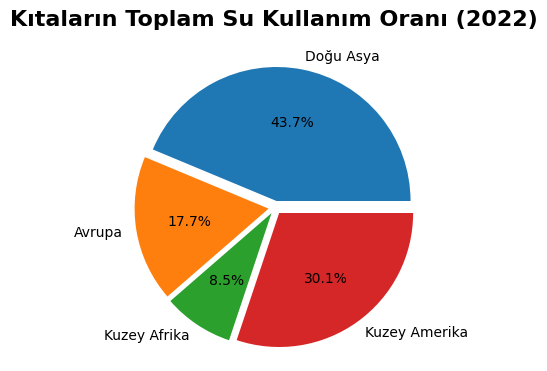

In [ ]:
# =============================================================================
#  Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Pie Chart)
# =============================================================================

labels = get_tr_labels(total_water_withdrawal_2022['Area'])  # T√ºrk√ße labellarƒ± al basta belirtilen fonksiyonla
sizes = total_water_withdrawal_2022['Value']
colors = [continent_colors.get(area, '#333333') for area in total_water_withdrawal_2022['Area']]
explode = [0.05]*len(labels)

plt.figure(figsize=(6, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%', # 43.7%, 17.7%, vs. seklinde yazabilmek icin
    explode=explode,
    colors=colors
)
plt.title(f'Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ± ({latest_year})', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

## Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Bar Chart)

In [ ]:
# =============================================================================
# Kƒ±talarƒ±n Toplam Su Kullanƒ±m Oranƒ±(2022) (Bar Chart)
# =============================================================================

# Bu yukaridaki pie chart verisinin aynisi, sadece bar chart olarak duzenlendi.
# Yukarida yuzde olarak verildi, burada metrekup cinsinden.

ordered_data = []
for continent in continents_custom_order:
    cont_data = total_water_withdrawal_2022[total_water_withdrawal_2022['Area'] == continent]
    if not cont_data.empty:
        ordered_data.append({
            'Area': continent,
            'Value': cont_data['Value'].iloc[0]
        })

areas = [item['Area'] for item in ordered_data]
values = [item['Value'] for item in ordered_data]
labels = get_tr_labels(areas)
colors = [continent_colors.get(area, '#333333') for area in areas]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Deƒüerleri barlarƒ±n √ºst√ºne ekle
for i, (bar, value) in enumerate(zip(bars, values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xlabel('Kƒ±talar', labelpad=10, fontsize=12, fontweight='bold')
plt.ylabel('Toplam Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', labelpad=10, fontsize=12, fontweight='bold')
plt.title(f'Kƒ±talarƒ±n Toplam Su Kullanƒ±mƒ± ({latest_year})',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Kƒ±ta Bazƒ±nda Sekt√∂rel Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±(2022) (Bar Chart)

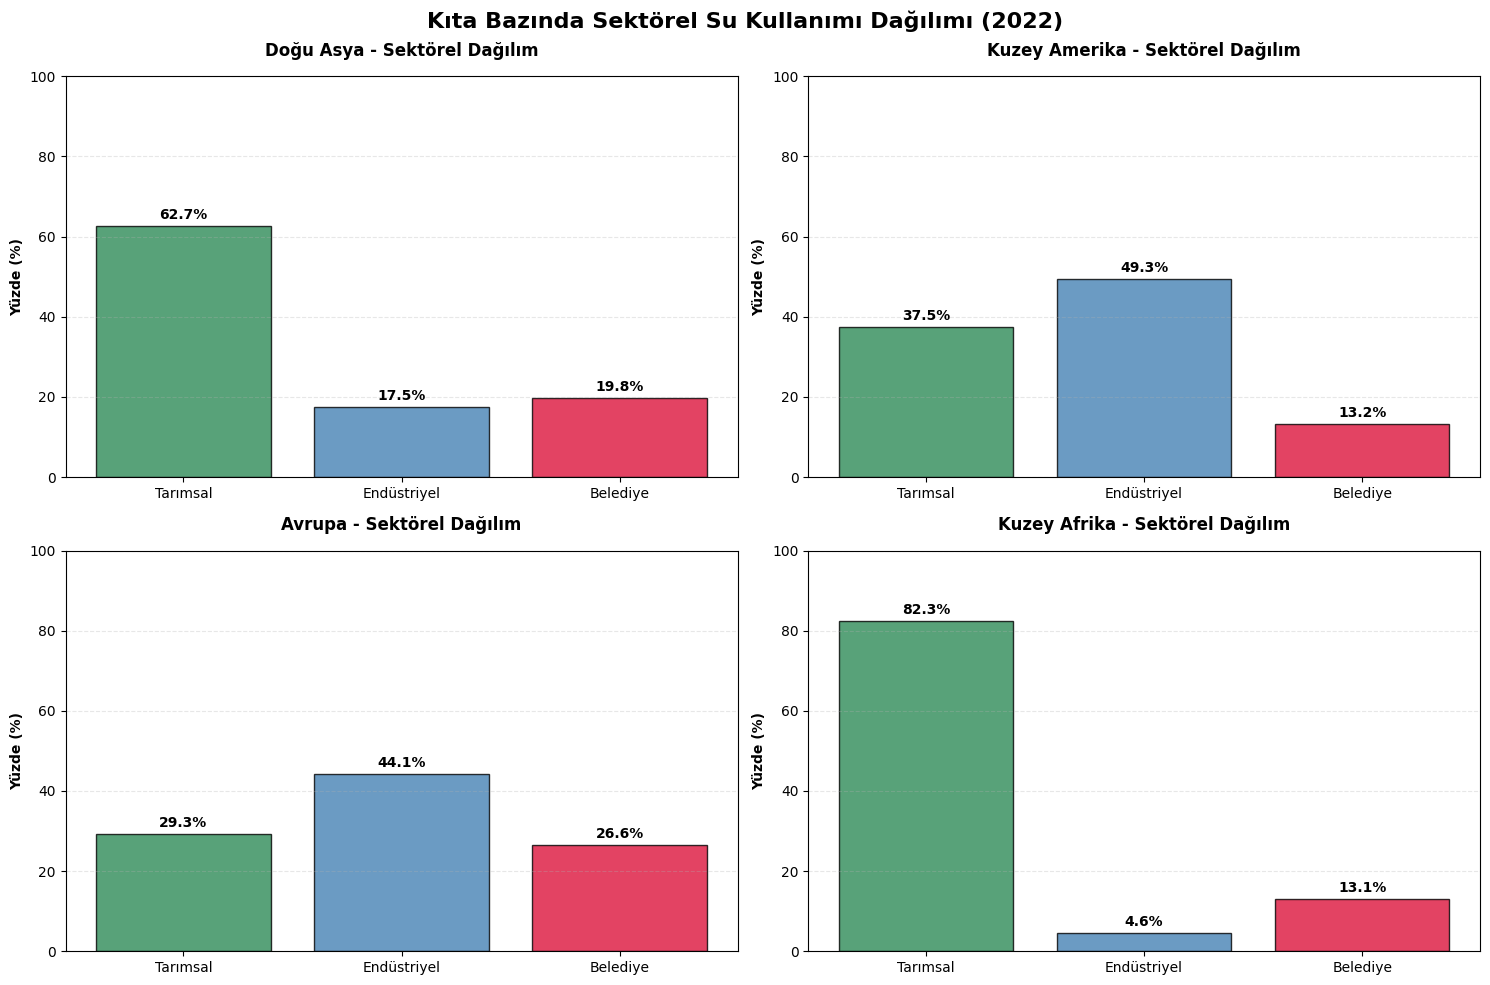

In [ ]:

# =============================================================================
# Kƒ±ta Bazƒ±nda Sekt√∂rel Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ±(2022) (Bar Chart)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

# Y√ºzde deƒüi≈ükenleri
percentage_variables = [
    'Agricultural water withdrawal as % of total water withdrawal',
    'Industrial water withdrawal as % of total water withdrawal'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, continent in enumerate(continents_custom_order):
    # Her kƒ±ta i√ßin ayrƒ± grafik
    agri_data = continent_data[
        (continent_data['Area'] == continent) &
        (continent_data['Variable'] == percentage_variables[0]) &
        (continent_data['Year'] == latest_year)
    ]

    ind_data = continent_data[
        (continent_data['Area'] == continent) &
        (continent_data['Variable'] == percentage_variables[1]) &
        (continent_data['Year'] == latest_year)
    ]

    agri_pct = agri_data['Value'].iloc[0] if not agri_data.empty else 0
    ind_pct = ind_data['Value'].iloc[0] if not ind_data.empty else 0
    municipal_pct = 100 - agri_pct - ind_pct  #

    categories = ['Tarƒ±msal', 'End√ºstriyel', 'Belediye']
    values = [agri_pct, ind_pct, municipal_pct]
    colors_sect = ['#2E8B57', '#4682B4', '#DC143C']  # Ye≈üil, Mavi, Kƒ±rmƒ±zƒ±

    bars = axes[i].bar(categories, values, color=colors_sect, alpha=0.8,
                      edgecolor='black', linewidth=1)


    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

    axes[i].set_title(f'{get_tr_labels([continent])[0]} - Sekt√∂rel Daƒüƒ±lƒ±m',
                     fontsize=12, fontweight='bold', pad=15)
    axes[i].set_ylabel('Y√ºzde (%)', fontsize=10, fontweight='bold')
    axes[i].set_ylim(0, 100)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle(f'Kƒ±ta Bazƒ±nda Sekt√∂rel Su Kullanƒ±mƒ± Daƒüƒ±lƒ±mƒ± ({latest_year})',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Kƒ±talara G√∂re Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ±(2022) (Bar chart)

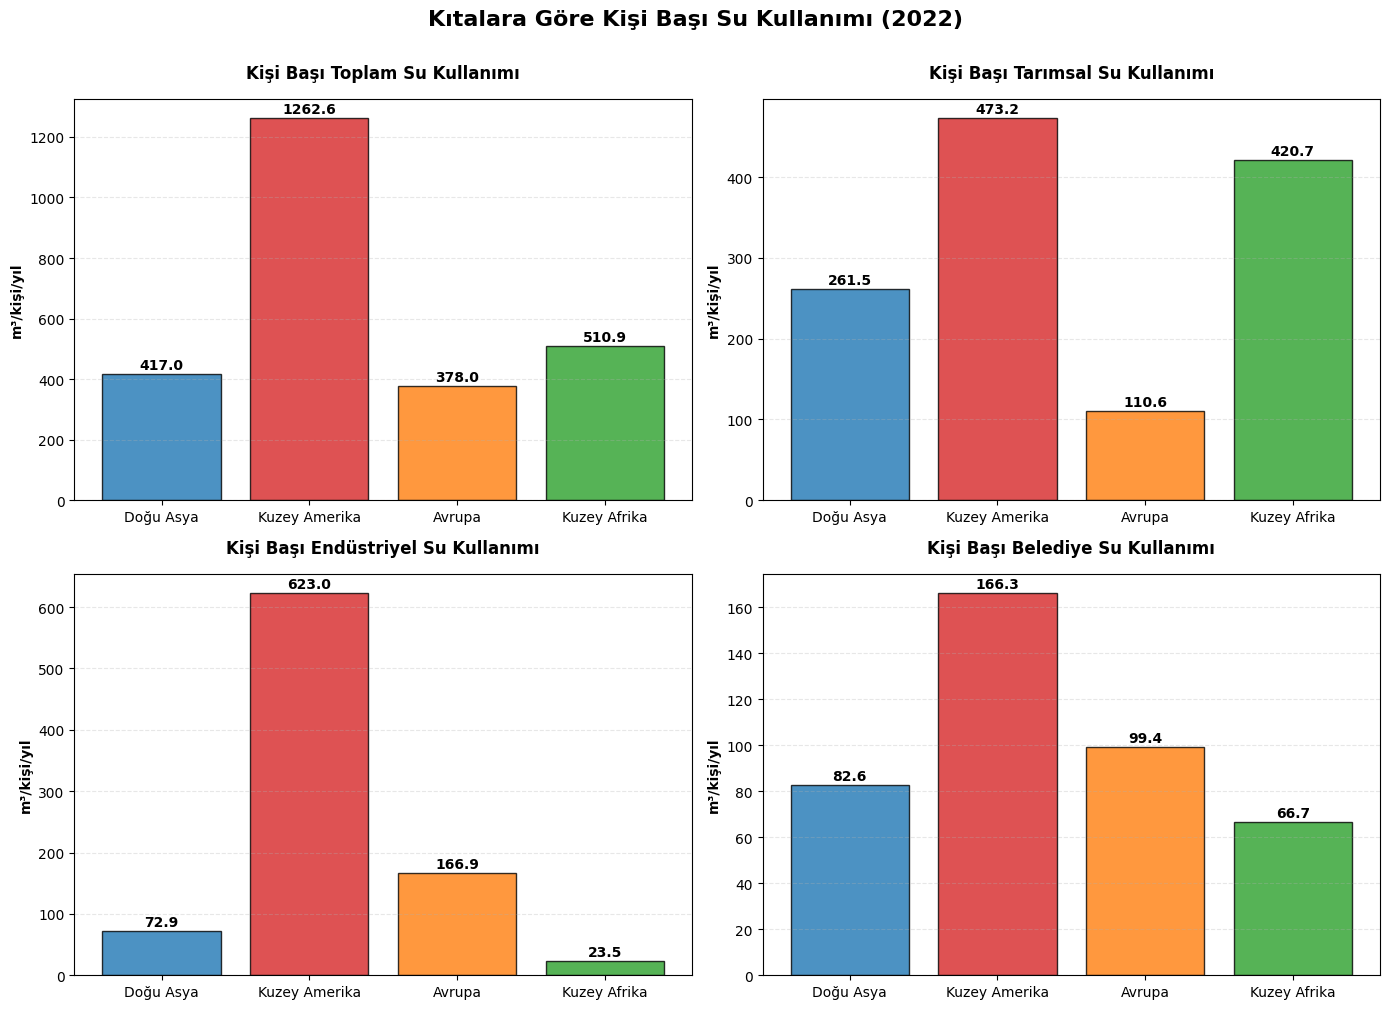

In [ ]:
# =============================================================================
# Kƒ±talara G√∂re Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ±(2022) (Bar chart)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

per_capita_variables = [
    'Total water withdrawal per capita',
    'Agricultural water withdrawal per capita',
    'Industrial water withdrawal per capita',
    'Municipal water withdrawal per capita (total population)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, variable in enumerate(per_capita_variables):
    values = []
    labels = []
    colors = []

    for continent in continents_custom_order:
        data = continent_data[
            (continent_data['Area'] == continent) &
            (continent_data['Variable'] == variable) &
            (continent_data['Year'] == latest_year)
        ]

        if not data.empty:
            values.append(data['Value'].iloc[0])
            labels.append(get_tr_labels([continent])[0])
            colors.append(continent_colors.get(continent, '#333333'))

    bars = axes[i].bar(labels, values, color=colors, alpha=0.8,
                      edgecolor='black', linewidth=1)

    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.005,
                    f'{value:.1f}', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

    axes[i].set_title(get_tr_variable(variable), fontsize=12, fontweight='bold', pad=15)
    axes[i].set_ylabel('m¬≥/ki≈üi/yƒ±l', fontsize=10, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle(f'Kƒ±talara G√∂re Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ± ({latest_year})',
             fontsize=16, fontweight='bold', y=1.005)
plt.tight_layout()
plt.show()

## Su Kullanƒ±mƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±(2022) (Heatmap)

In [ ]:
# =============================================================================
# Su Kullanƒ±mƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±(2022) (Heatmap)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

key_variables = [
    'Total water withdrawal',
    'Agricultural water withdrawal',
    'Industrial water withdrawal',
    'Municipal water withdrawal'
]

# X ekseni labellarƒ± i√ßin T√ºrk√ße √ßeviri
x_labels = [get_tr_variable(var) for var in key_variables]
x_labels_short = ['Toplam', 'Tarƒ±msal', 'End√ºstriyel', 'Belediye']

# Create matrix
heatmap_data = []
for continent in continents_custom_order:
    row = []
    for variable in key_variables:
        subset = continent_data[
            (continent_data['Area'] == continent) &
            (continent_data['Variable'] == variable) &
            (continent_data['Year'] == latest_year)
        ]
        value = subset['Value'].iloc[0] if not subset.empty else 0
        row.append(value)
    heatmap_data.append(row)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.xticks(rotation=0)  # Yatay etiketler

sns.heatmap(heatmap_data,
           xticklabels=x_labels_short,
           yticklabels=[get_tr_labels([c])[0] for c in continents_custom_order], # T√ºrk√ße kita isimleri
           annot=True, fmt='.1f', cmap='Blues')
plt.title(f'Su Kullanƒ±mƒ± Kar≈üƒ±la≈ütƒ±rmasƒ± ({latest_year})', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Su Kullanƒ±m Alanƒ±', labelpad=10, fontsize=10, fontweight='bold')  # X ekseni ba≈ülƒ±ƒüƒ±
plt.ylabel('Kƒ±talar', labelpad=10, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## Kƒ±talar Bazƒ±nda Tarƒ±msal Su Kullanƒ±mƒ±(2022) (Kabarcƒ±k Grafiƒüi)(Bubble Chart)

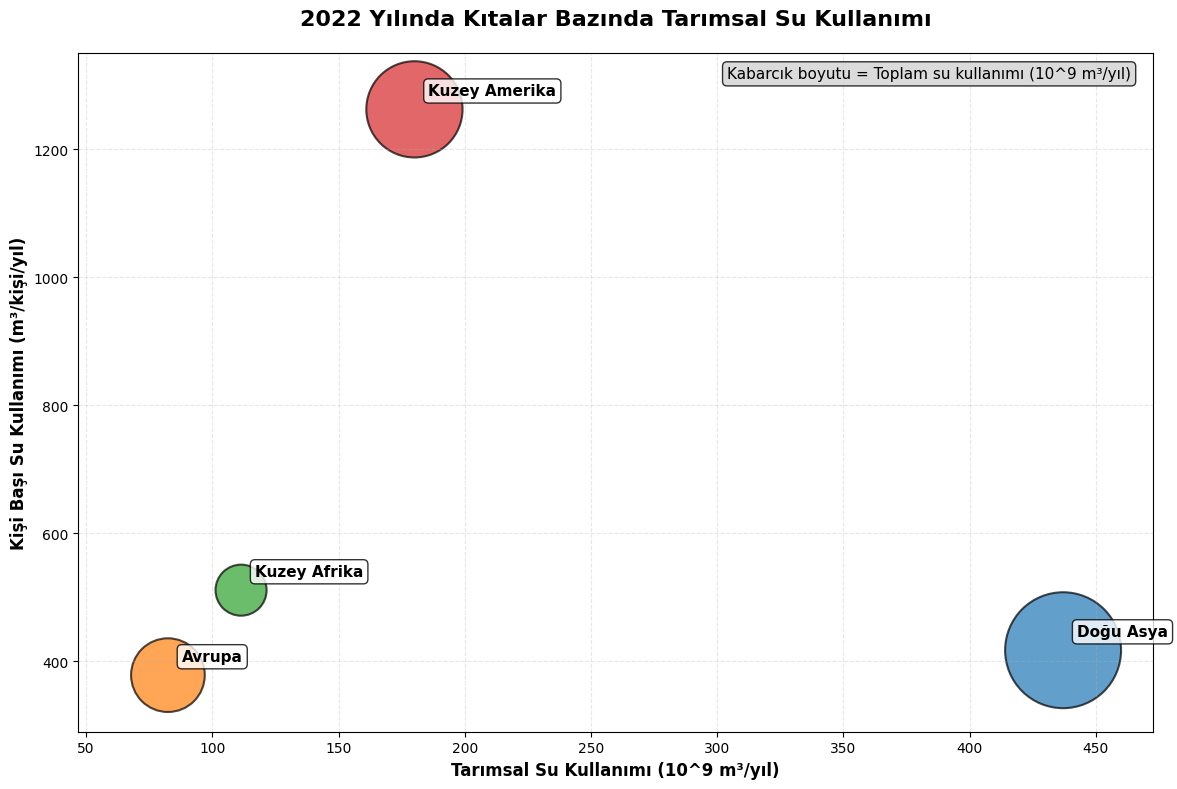

In [ ]:
# =============================================================================
# Kƒ±talar Bazƒ±nda Tarƒ±msal Su Kullanƒ±mƒ±(2022) (Kabarcƒ±k Grafiƒüi)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

agricultural_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    agricultural = continent_data[(continent_data['Area']==cont) &
                                  (continent_data['Variable']=='Agricultural water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanƒ±mƒ± (√∂l√ßekli)
    bubble_size = total * 10

    agricultural_values.append(agricultural)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(agricultural_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.margins(x=0.1, y=0.1)
plt.text(0.98, 0.98, 'Kabarcƒ±k boyutu = Toplam su kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top',
         horizontalalignment='right')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (agricultural_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Tarƒ±msal Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=12, fontweight='bold')
plt.ylabel('Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ± (m¬≥/ki≈üi/yƒ±l)', fontsize=12, fontweight='bold')
plt.title('2022 Yƒ±lƒ±nda Kƒ±talar Bazƒ±nda Tarƒ±msal Su Kullanƒ±mƒ±', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kƒ±talar Bazƒ±nda End√ºstriyel Su Kullanƒ±mƒ± -2022 (Kabarcƒ±k Grafiƒüi)(Bubble Chart)

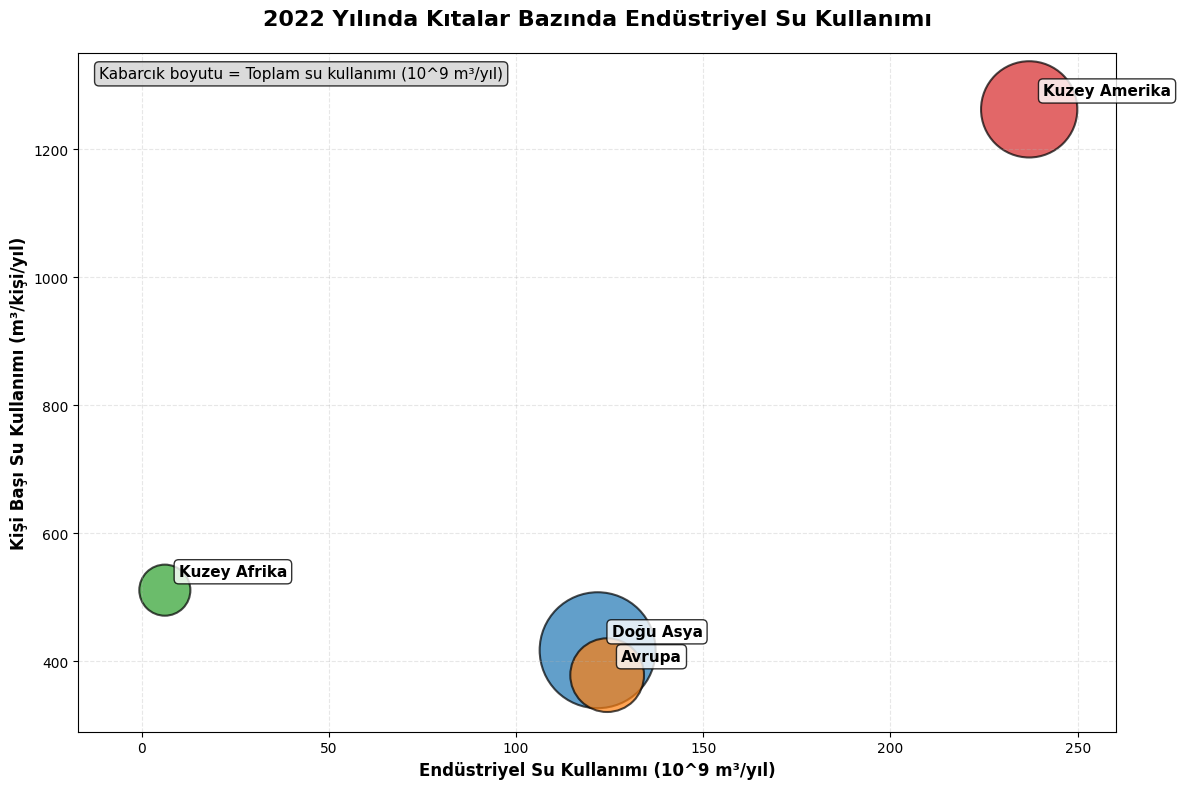

In [ ]:
# =============================================================================
# Kƒ±talar Bazƒ±nda End√ºstriyel Su Kullanƒ±mƒ± -2022 (Kabarcƒ±k Grafiƒüi)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

industrial_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    industrial = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Industrial water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanƒ±mƒ± (√∂l√ßekli)
    bubble_size = total * 10

    industrial_values.append(industrial)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(industrial_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.margins(x=0.1, y=0.1)
plt.text(0.02, 0.98, 'Kabarcƒ±k boyutu = Toplam su kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (industrial_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('End√ºstriyel Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=12, fontweight='bold')
plt.ylabel('Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ± (m¬≥/ki≈üi/yƒ±l)', fontsize=12, fontweight='bold')
plt.title('2022 Yƒ±lƒ±nda Kƒ±talar Bazƒ±nda End√ºstriyel Su Kullanƒ±mƒ±', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kƒ±talar Bazƒ±nda Belediye Su Kullanƒ±mƒ± (2022) (Kabarcƒ±k Grafiƒüi)(Bubble Chart)

In [ ]:
# =============================================================================
# Kƒ±talar Bazƒ±nda Belediye Su Kullanƒ±mƒ± (2022) (Kabarcƒ±k Grafiƒüi)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

municipal_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    municipal = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Municipal water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanƒ±mƒ± (√∂l√ßekli)
    bubble_size = total * 10

    municipal_values.append(municipal)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(municipal_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)

plt.margins(x=0.1, y=0.1)
plt.text(0.98, 0.98, 'Kabarcƒ±k boyutu = Toplam su kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top',
         horizontalalignment='right')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (municipal_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Belediye Su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=12, fontweight='bold')
plt.ylabel('Ki≈üi Ba≈üƒ± Su Kullanƒ±mƒ± (m¬≥/ki≈üi/yƒ±l)', fontsize=12, fontweight='bold')
plt.title('2022 Yƒ±lƒ±nda Kƒ±talar Bazƒ±nda Belediye Su Kullanƒ±mƒ±', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kƒ±talar Bazƒ±nda Yƒ±llara G√∂re Su Kullanƒ±mƒ± (Slope Chart)

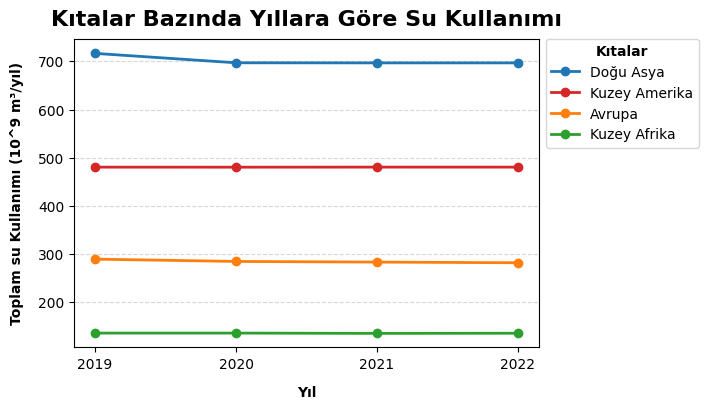

In [ ]:
# =============================================================================
# Kƒ±talar Bazƒ±nda Yƒ±llara G√∂re Su Kullanƒ±mƒ± (Slope Chart)
# =============================================================================

subset = aggregate_data[(aggregate_data['Area'].isin(continents)) &
                        (aggregate_data['Variable']=='Total water withdrawal')]

# UI iyilestirmesi - Grafikteki sira ile bilgilendirmedeki siranin eslesmesi icin
continent_final_values = {}
for area in continents:
    temp = subset[subset['Area']==area].sort_values('Year')
    continent_final_values[area] = temp['Value'].iloc[-1]

continents_sorted = sorted(continents, key=lambda x: continent_final_values[x], reverse=True)

# Slope Chart'in olusturulmasi
plt.figure(figsize=(6,4))

for area in continents_sorted:
    temp = subset[subset['Area']==area].sort_values('Year')
    plt.plot(temp['Year'], temp['Value'], marker='o',
            label=get_tr_labels([area])[0],
            color=continent_colors.get(area, '#333333'), linewidth=2)

plt.xlabel('Yƒ±l', fontsize=10, fontweight='bold', labelpad=10)
plt.ylabel('Toplam su Kullanƒ±mƒ± (10^9 m¬≥/yƒ±l)', fontsize=10, fontweight='bold', labelpad=10) # 1 Milyar Metrekup
plt.title('Kƒ±talar Bazƒ±nda Yƒ±llara G√∂re Su Kullanƒ±mƒ±', fontsize=16, fontweight='bold', pad=10)
plt.xticks(temp['Year'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.5)
legend = plt.legend(title='Kƒ±talar', loc='upper left', bbox_to_anchor=(1, 1.025))
legend.get_title().set_fontweight('bold')

plt.show()